In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import os

from app.utils import load_counter_file

In [2]:
def plot_image(file_path, ax):
    im = img.imread(file_path)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [3]:
def plot_word_counts(counter, ax, limit=10):
    ax.set_title('Most frequent words')
    counter = { key: row for key, row in sorted(counter.items(), key=lambda item: -item[1]) }
    df = pd.DataFrame.from_dict({ 'words': list(counter.keys()), 'totals': list(counter.values()) }) 
    df.set_index(['words'], inplace=True)
    df['totals'][0:limit].plot(kind='bar', ax=ax)
    

In [4]:
# Traverse directories, show their contents and get the data required for the plots
characters_data = {}
total_counter = {}
for folder in os.scandir('app'):
    if not folder.is_dir():
        continue
    characters_data[folder.name] = {}
    print(f'{folder.name}')
    for item in os.scandir(f'app/{folder.name}'):
        print(f'  |- {item.name}')
        if item.name.find('.png') > 0:
            characters_data[folder.name]['image'] = f'app/{folder.name}/{item.name}'
        if item.name.find('.json') > 0:
            counter = load_counter_file(f'app/{folder.name}/counter.json')
            characters_data[folder.name]['counter'] = counter
            for word, count in counter.items():
                # aggregate all words counts for all characters
                total_counter[word] = total_counter.get(word, 0) + count
    print('\n')

Abe Simpson
  |- AbrahamSimpson.png
  |- counter.json
  |- quotes.csv


Apu Nahasapeemapetilon
  |- ApuNahasapeemapetilon.png
  |- counter.json
  |- quotes.csv


Bart Simpson
  |- BartSimpson.png
  |- counter.json
  |- quotes.csv


Chief Wiggum
  |- ChiefWiggum.png
  |- counter.json
  |- quotes.csv


Comic Book Guy
  |- ComicBookGuy.png
  |- counter.json
  |- quotes.csv


Dr. Nick
  |- NickRiviera.png
  |- counter.json
  |- quotes.csv


Duffman
  |- Duffman.png
  |- counter.json
  |- quotes.csv


Frank Grimes
  |- FrankGrimes.png
  |- counter.json
  |- quotes.csv


Groundskeeper Willie
  |- GroundskeeperWillie.png
  |- counter.json
  |- quotes.csv


Homer Simpson
  |- HomerSimpson.png
  |- counter.json
  |- quotes.csv


Lisa Simpson
  |- LisaSimpson.png
  |- counter.json
  |- quotes.csv


Marge Simpson
  |- MargeSimpson.png
  |- counter.json
  |- quotes.csv


Mayor Quimby
  |- MayorQuimby.png
  |- counter.json
  |- quotes.csv


Milhouse Van Houten
  |- MilhouseVanHouten.png
  |- counte

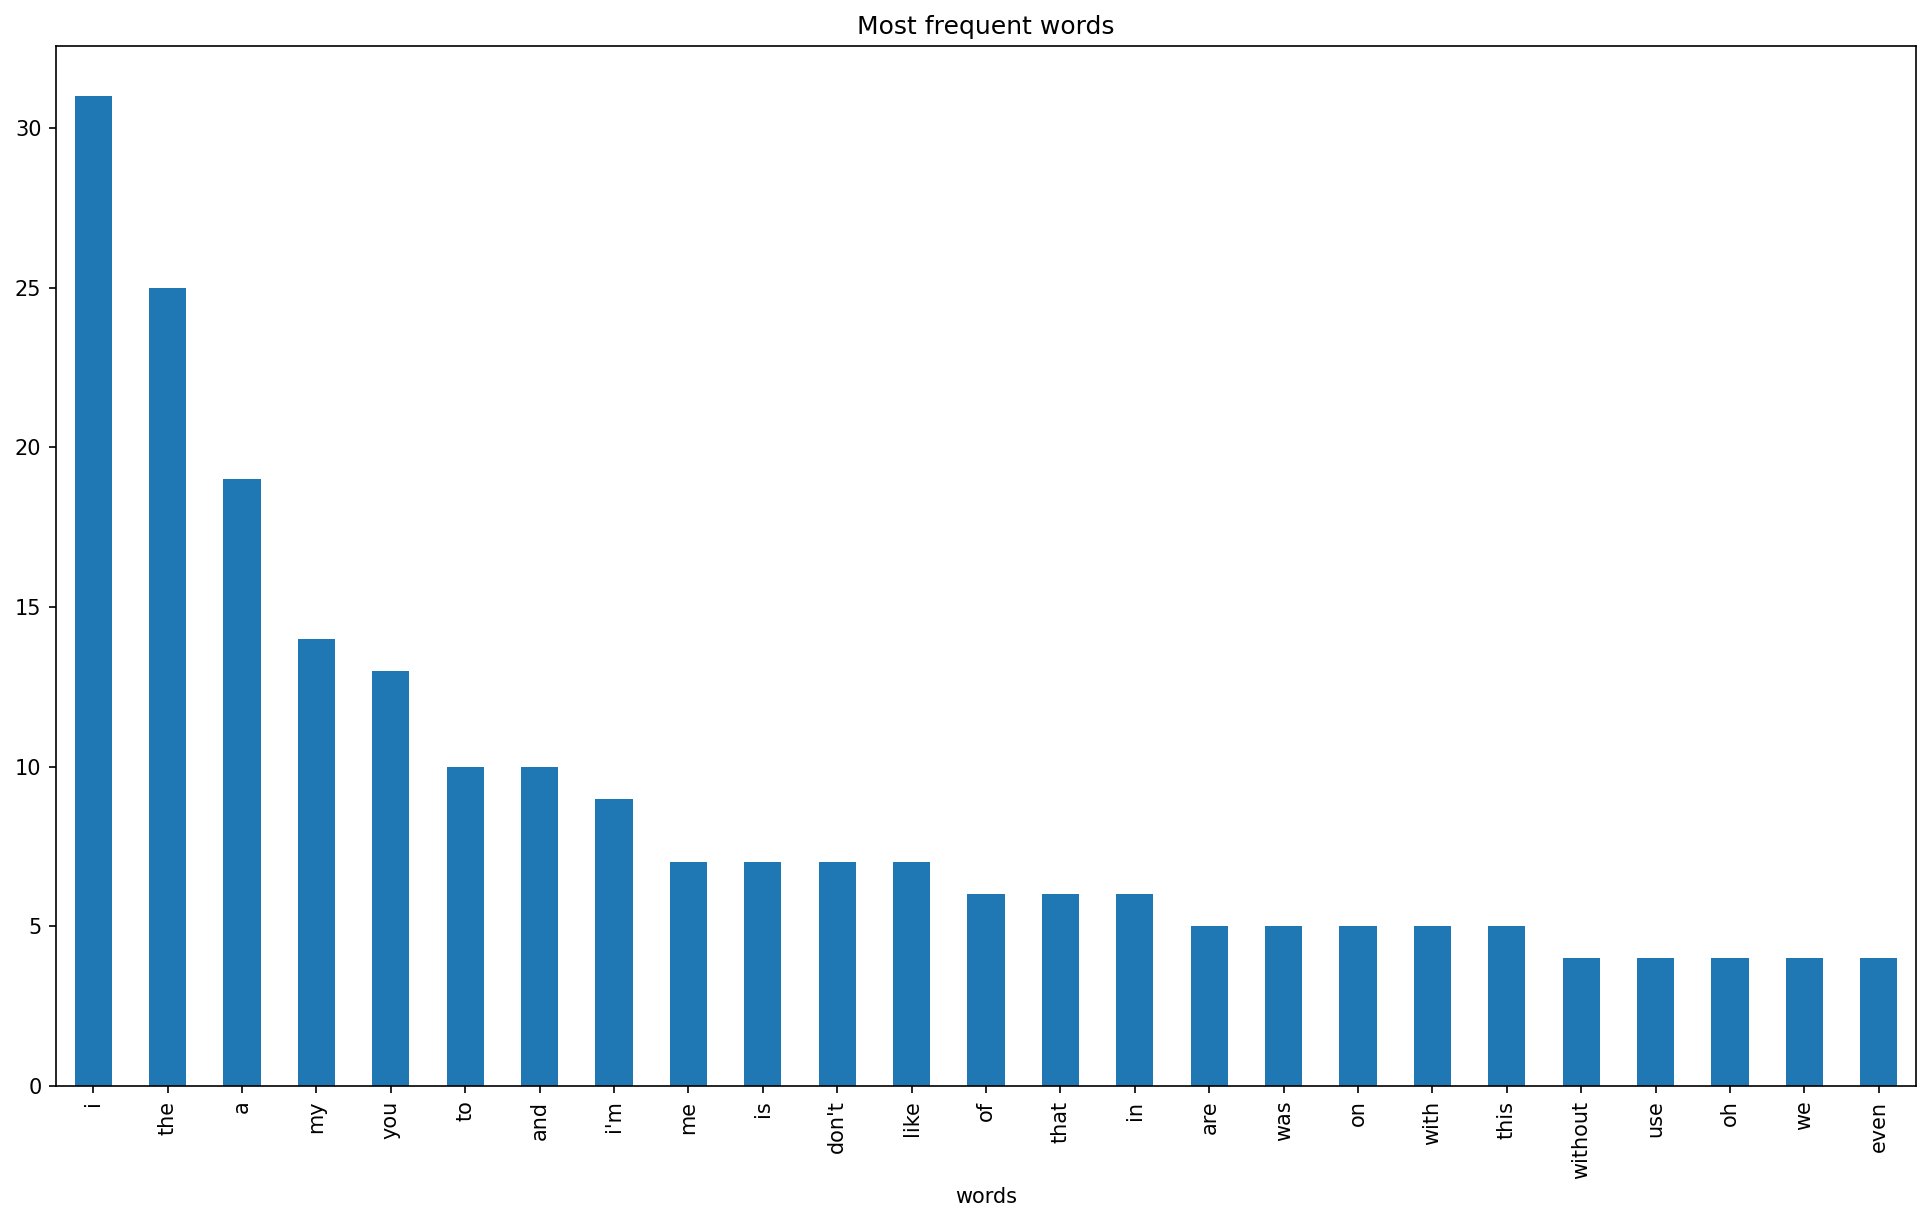

In [5]:
# Most frequent words among all characters
fig,ax = plt.subplots(figsize=(16,9), dpi=150)
plot_word_counts(total_counter, ax, 25)

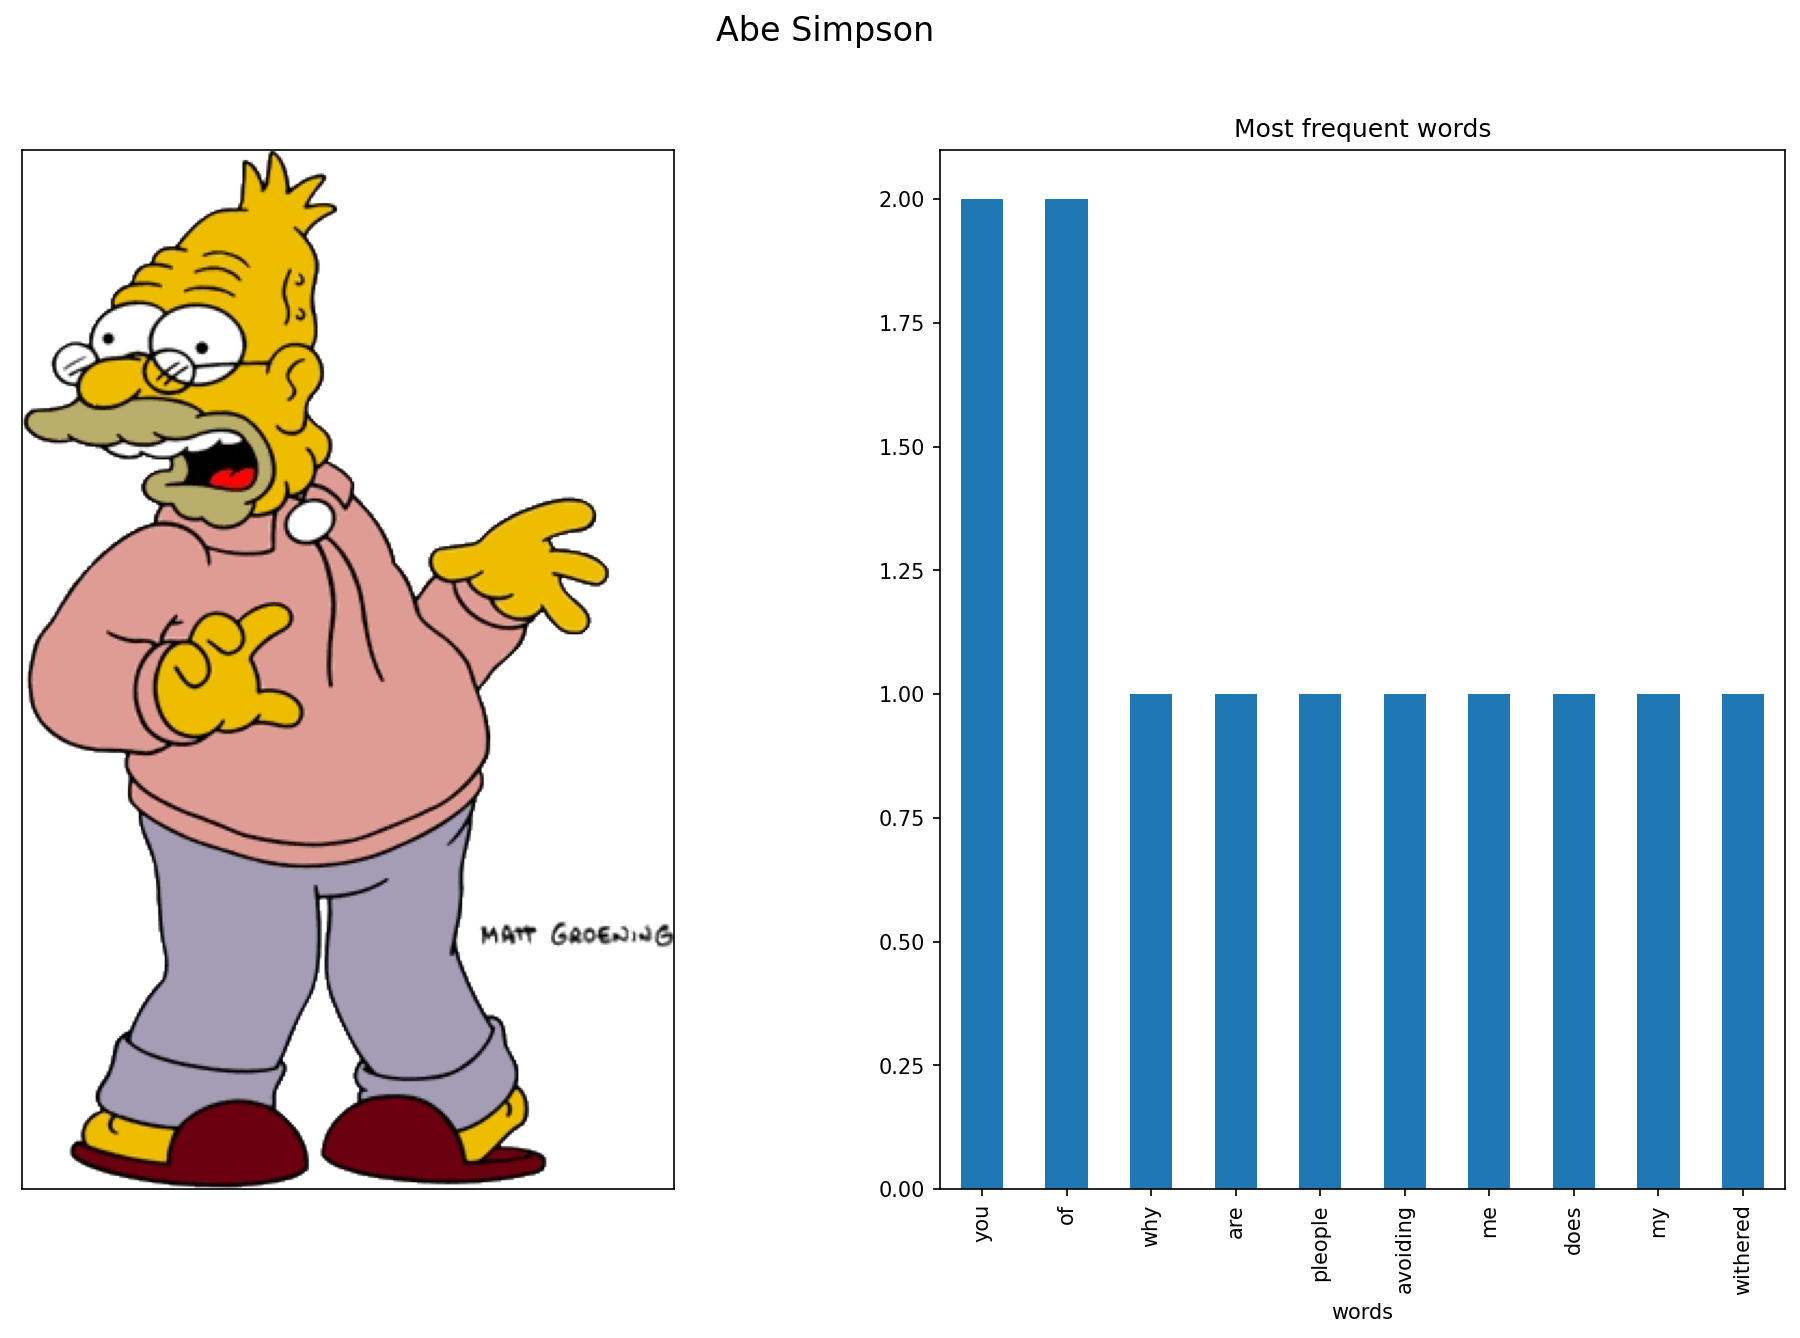

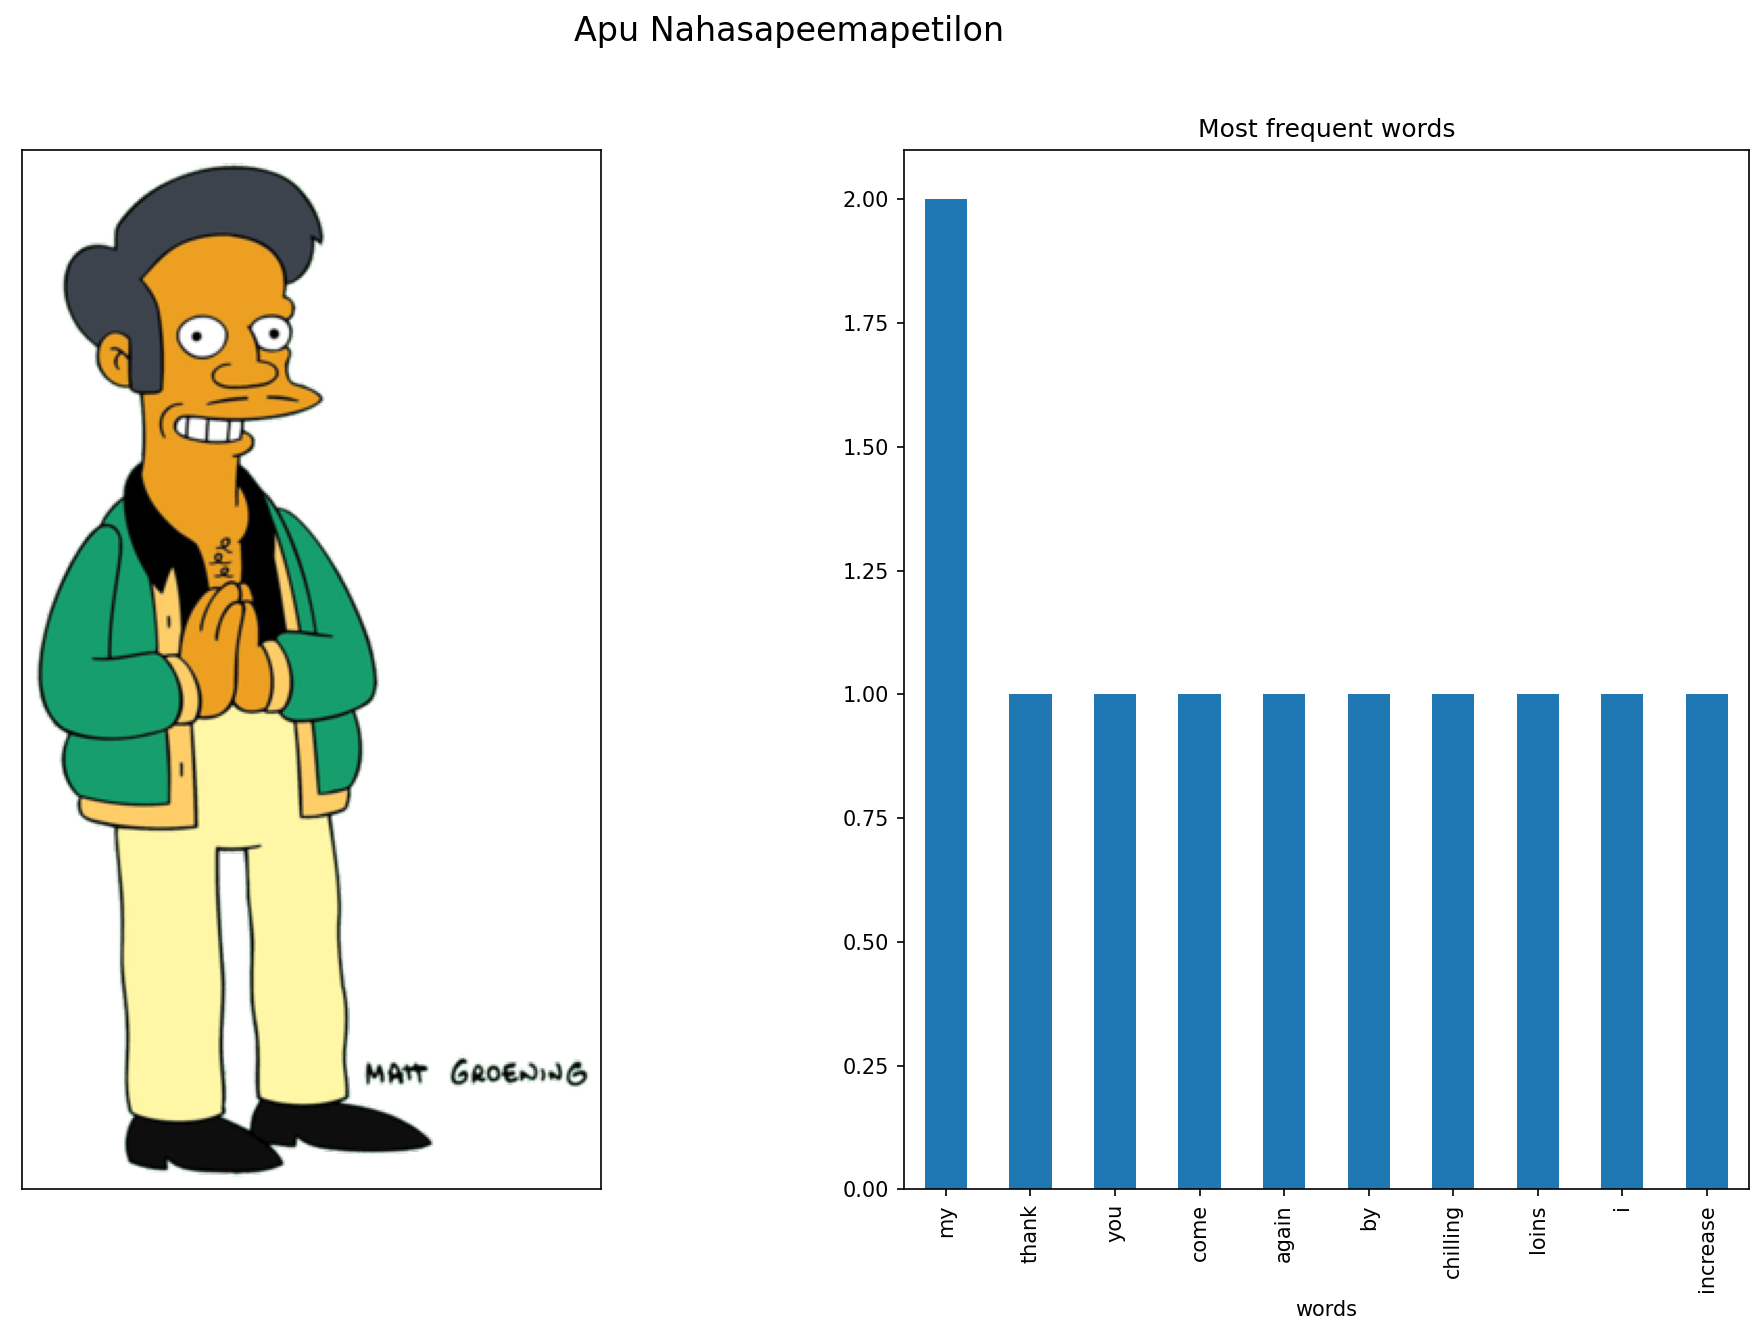

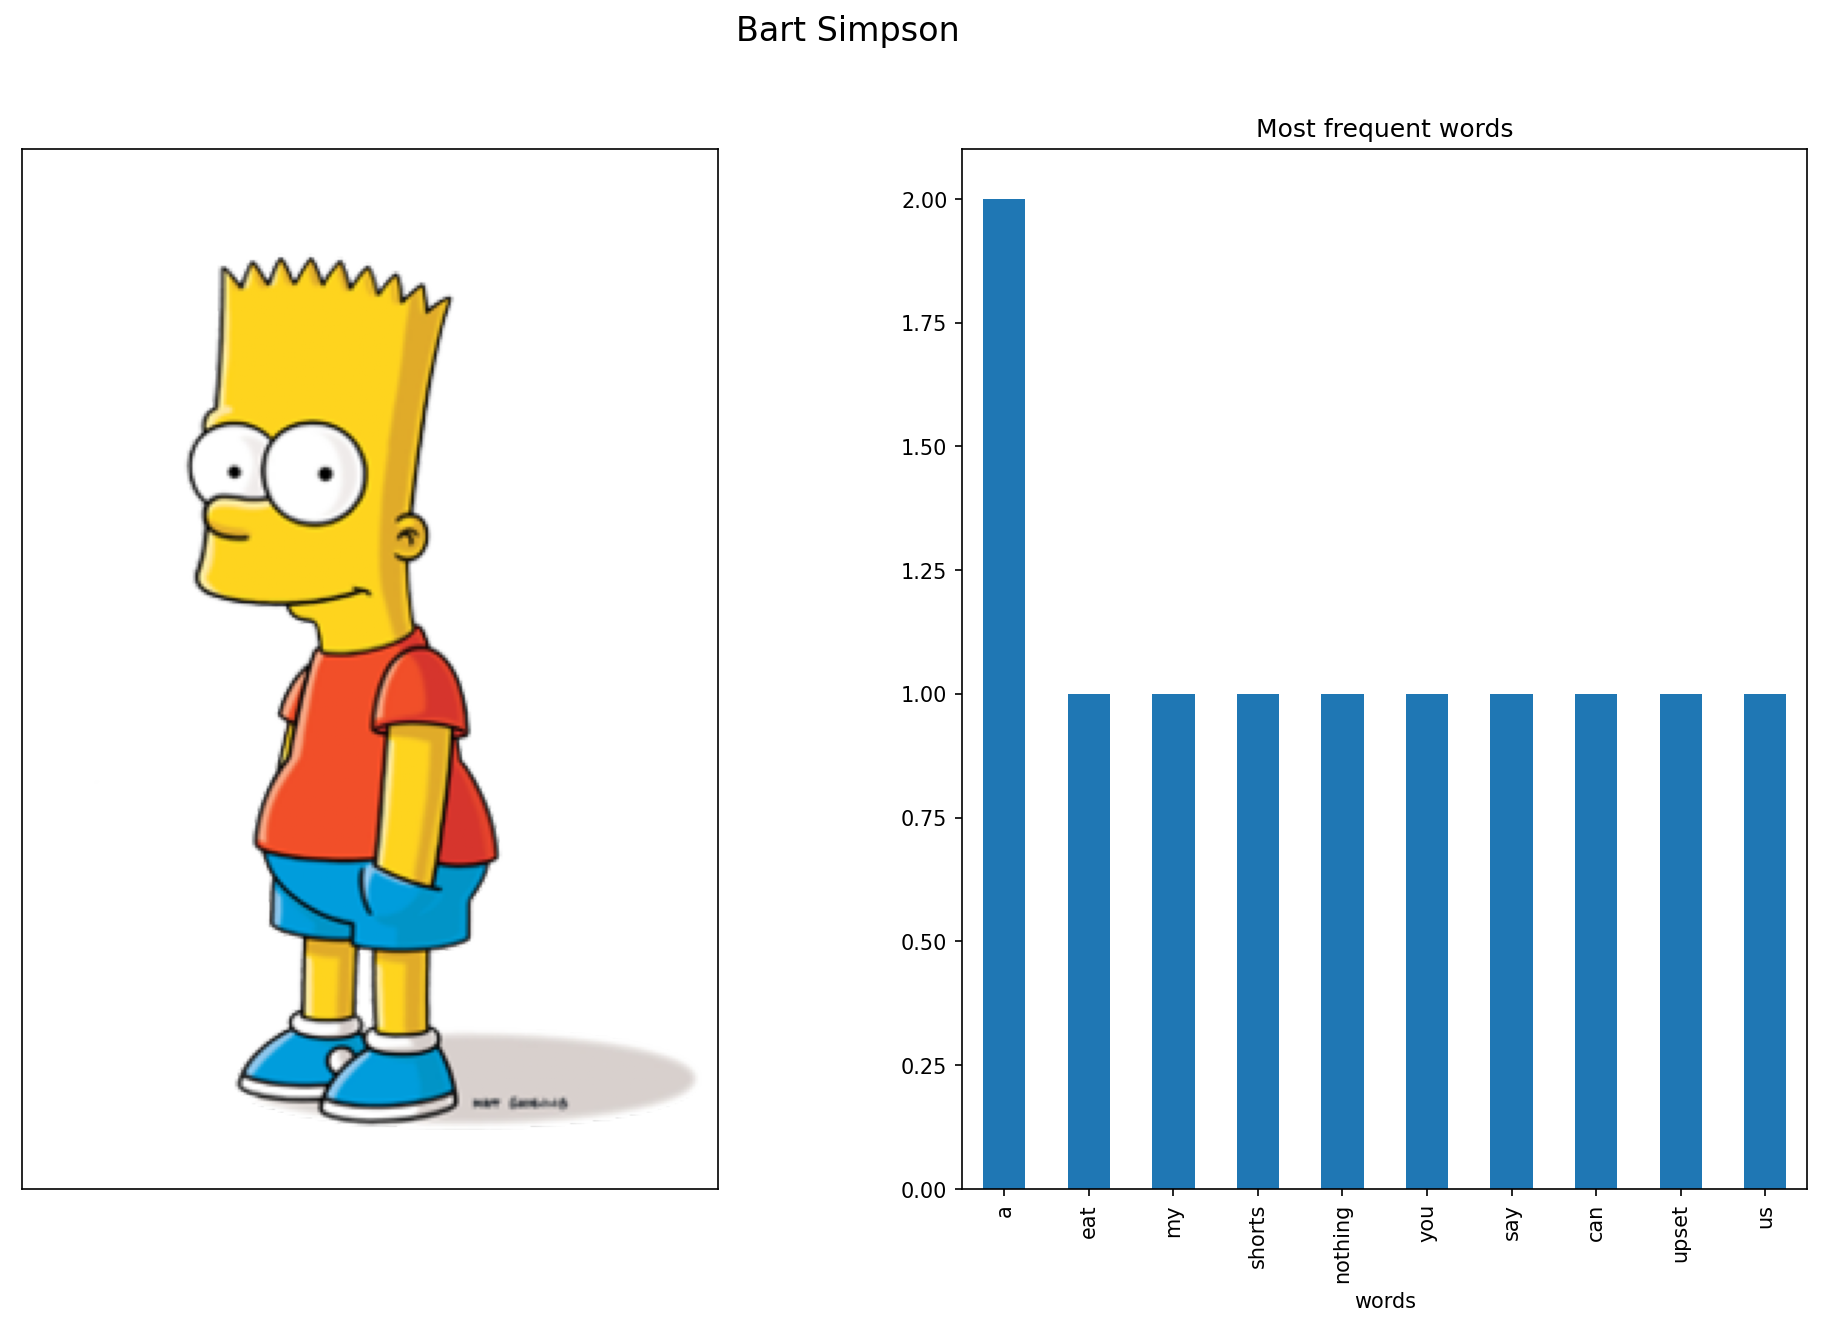

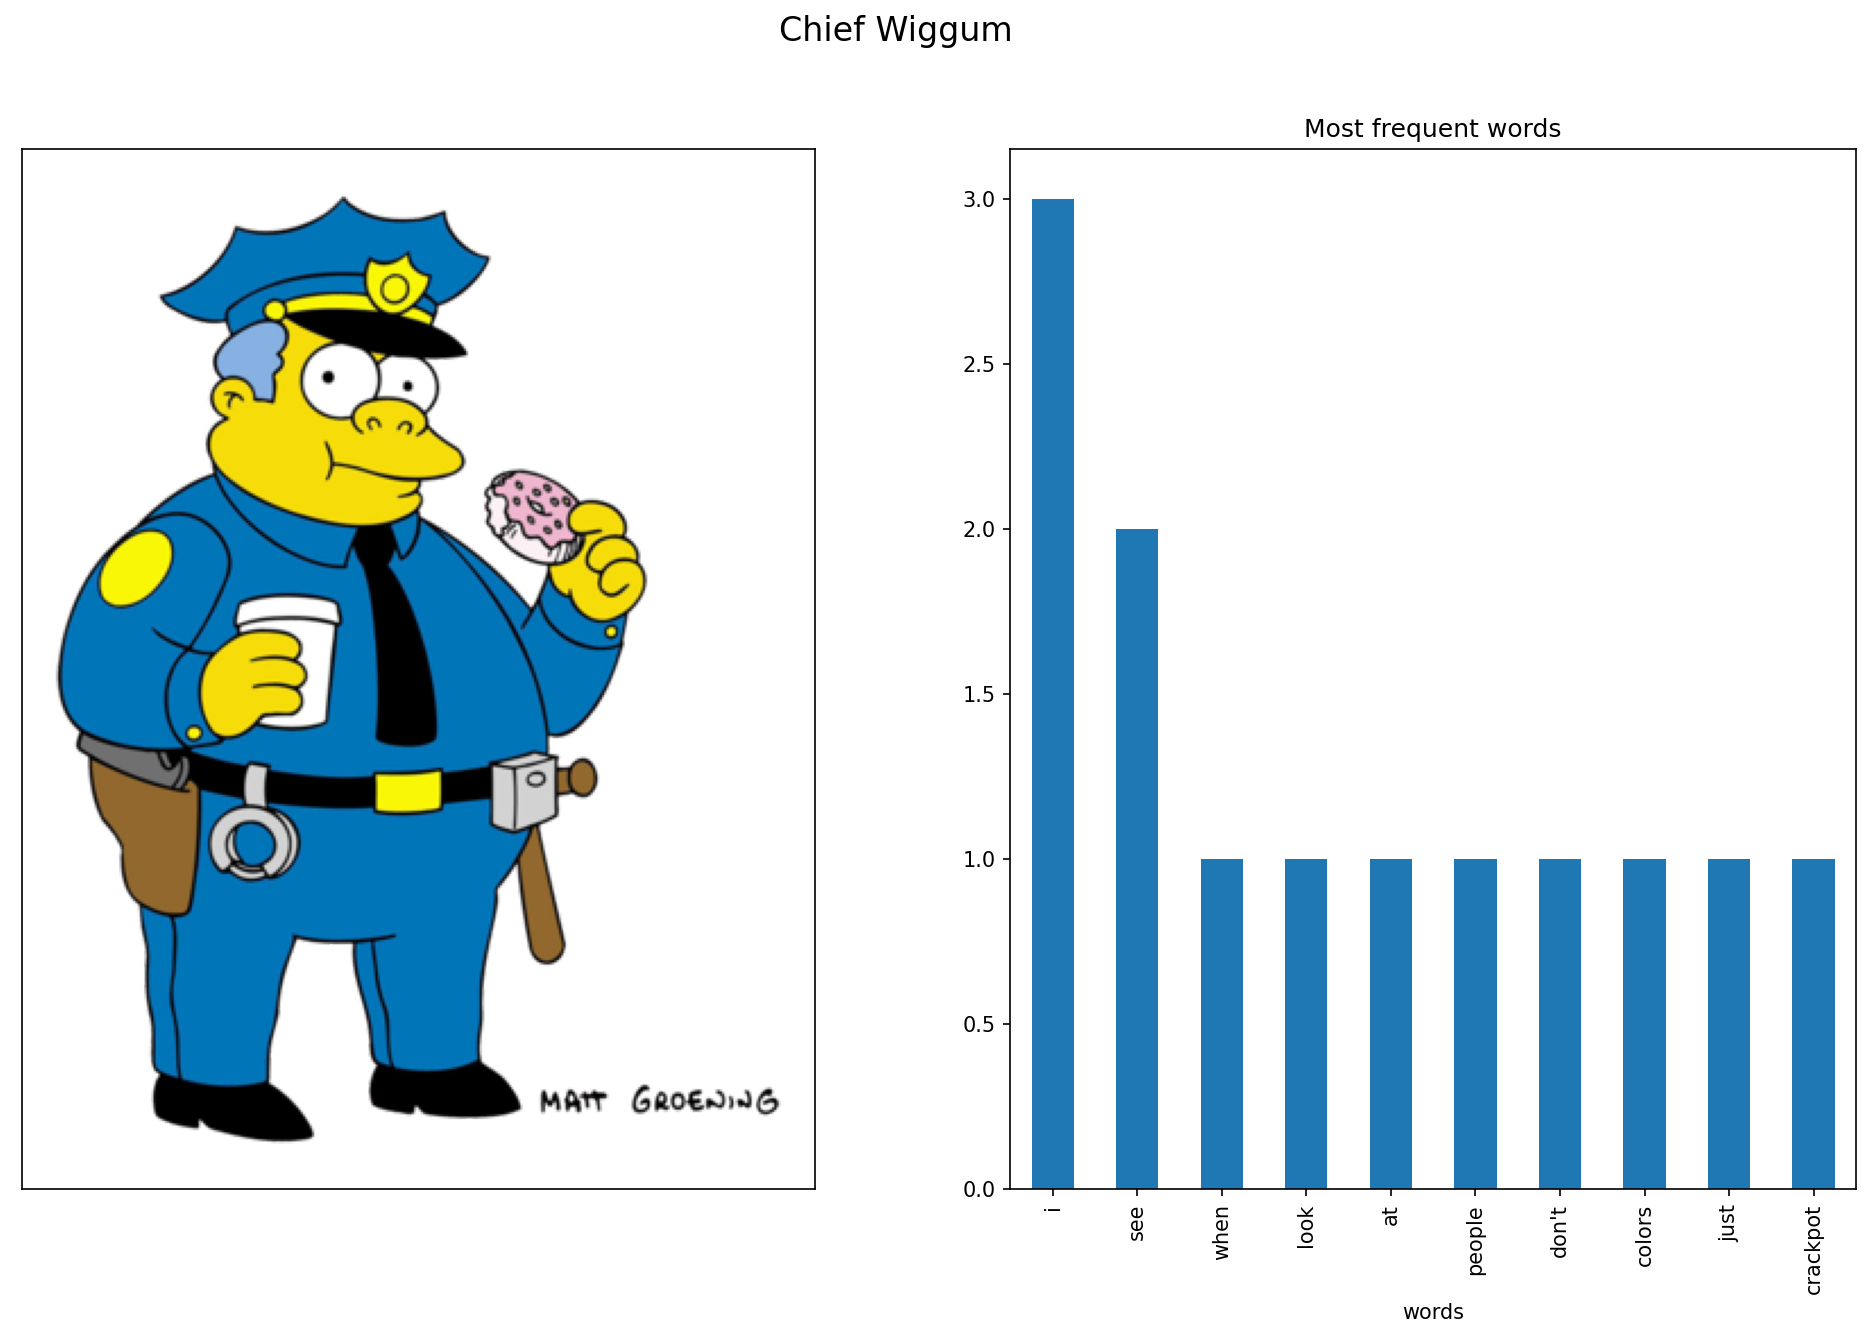

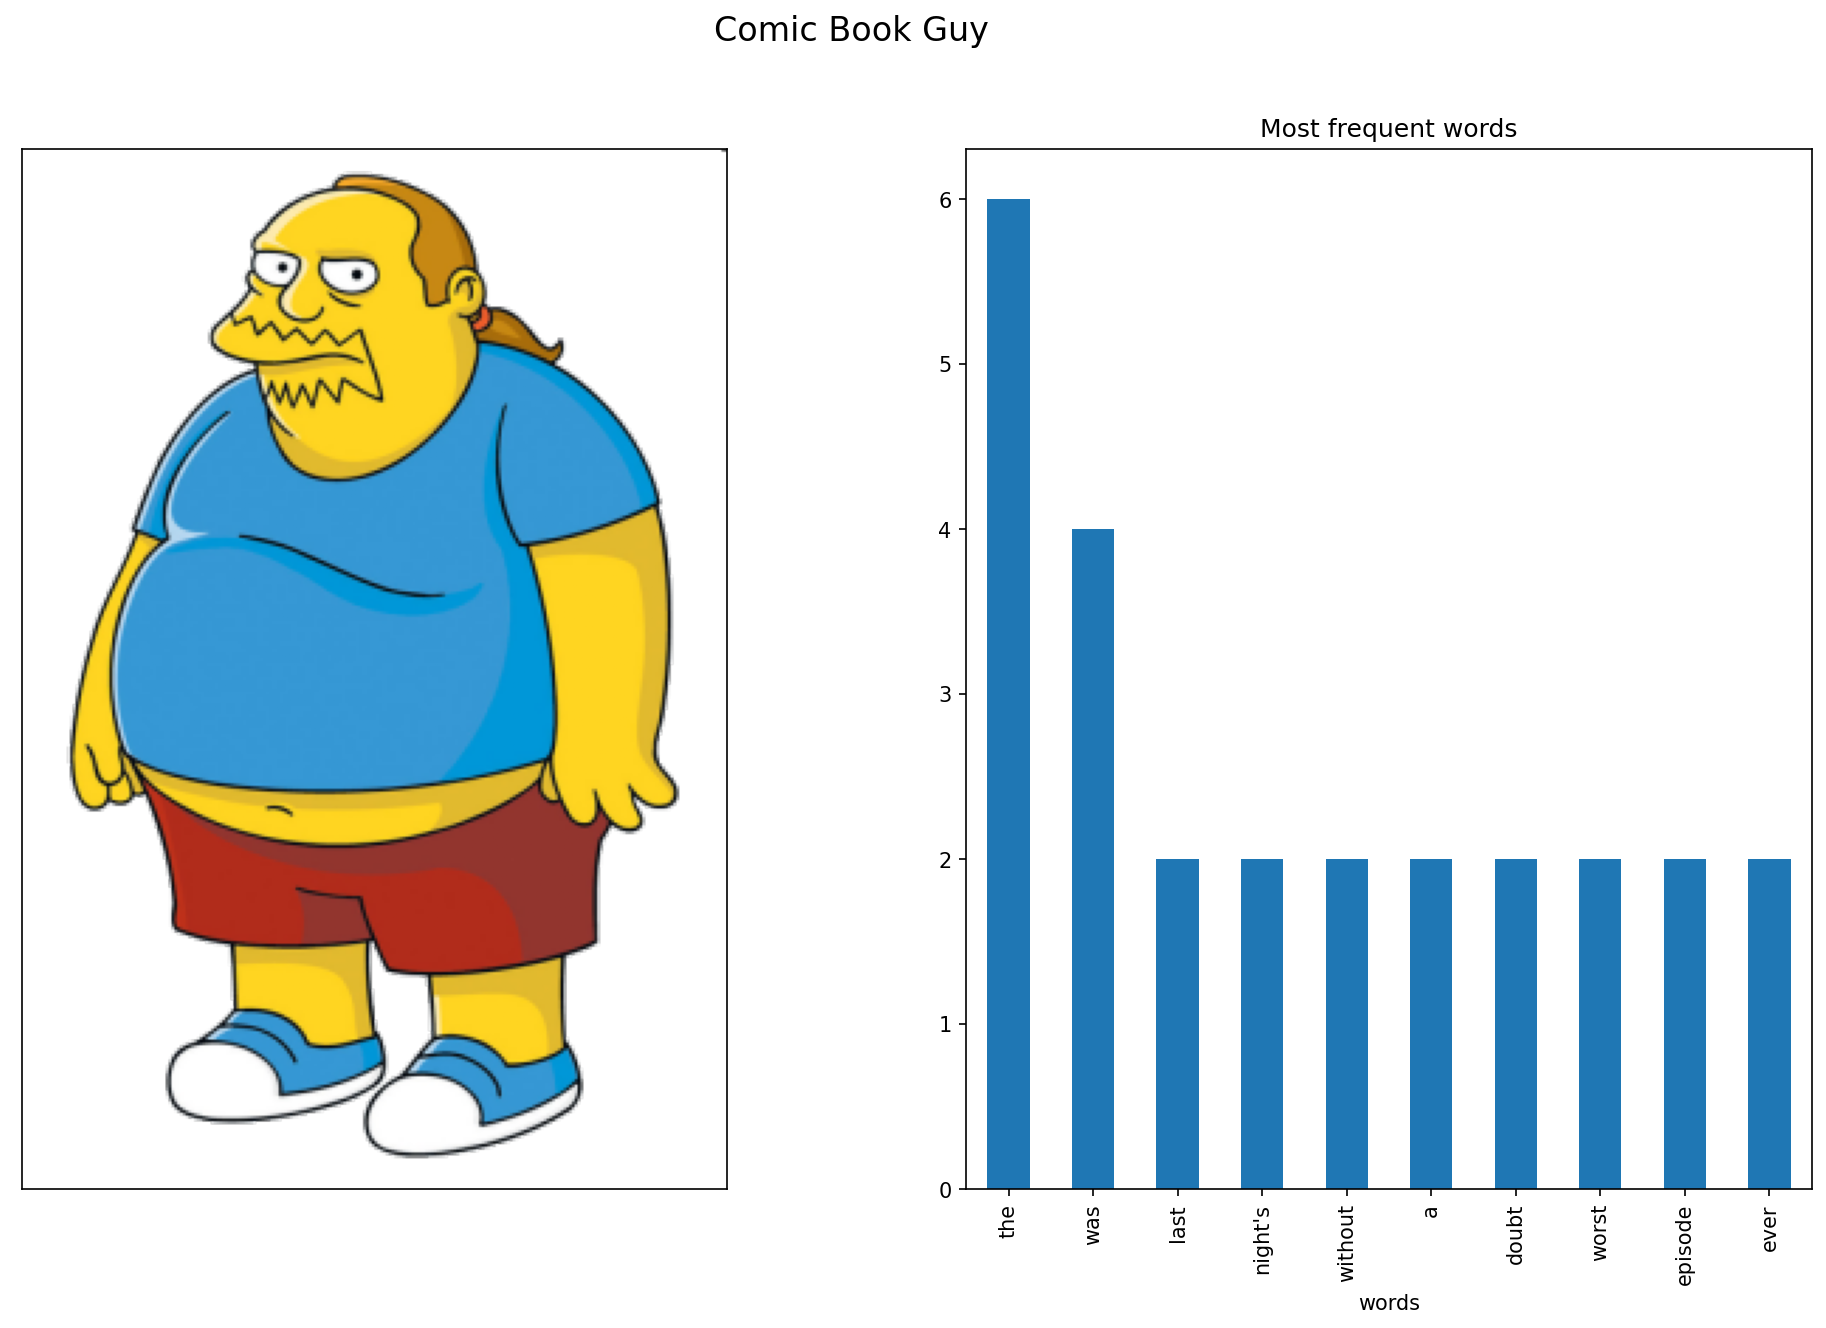

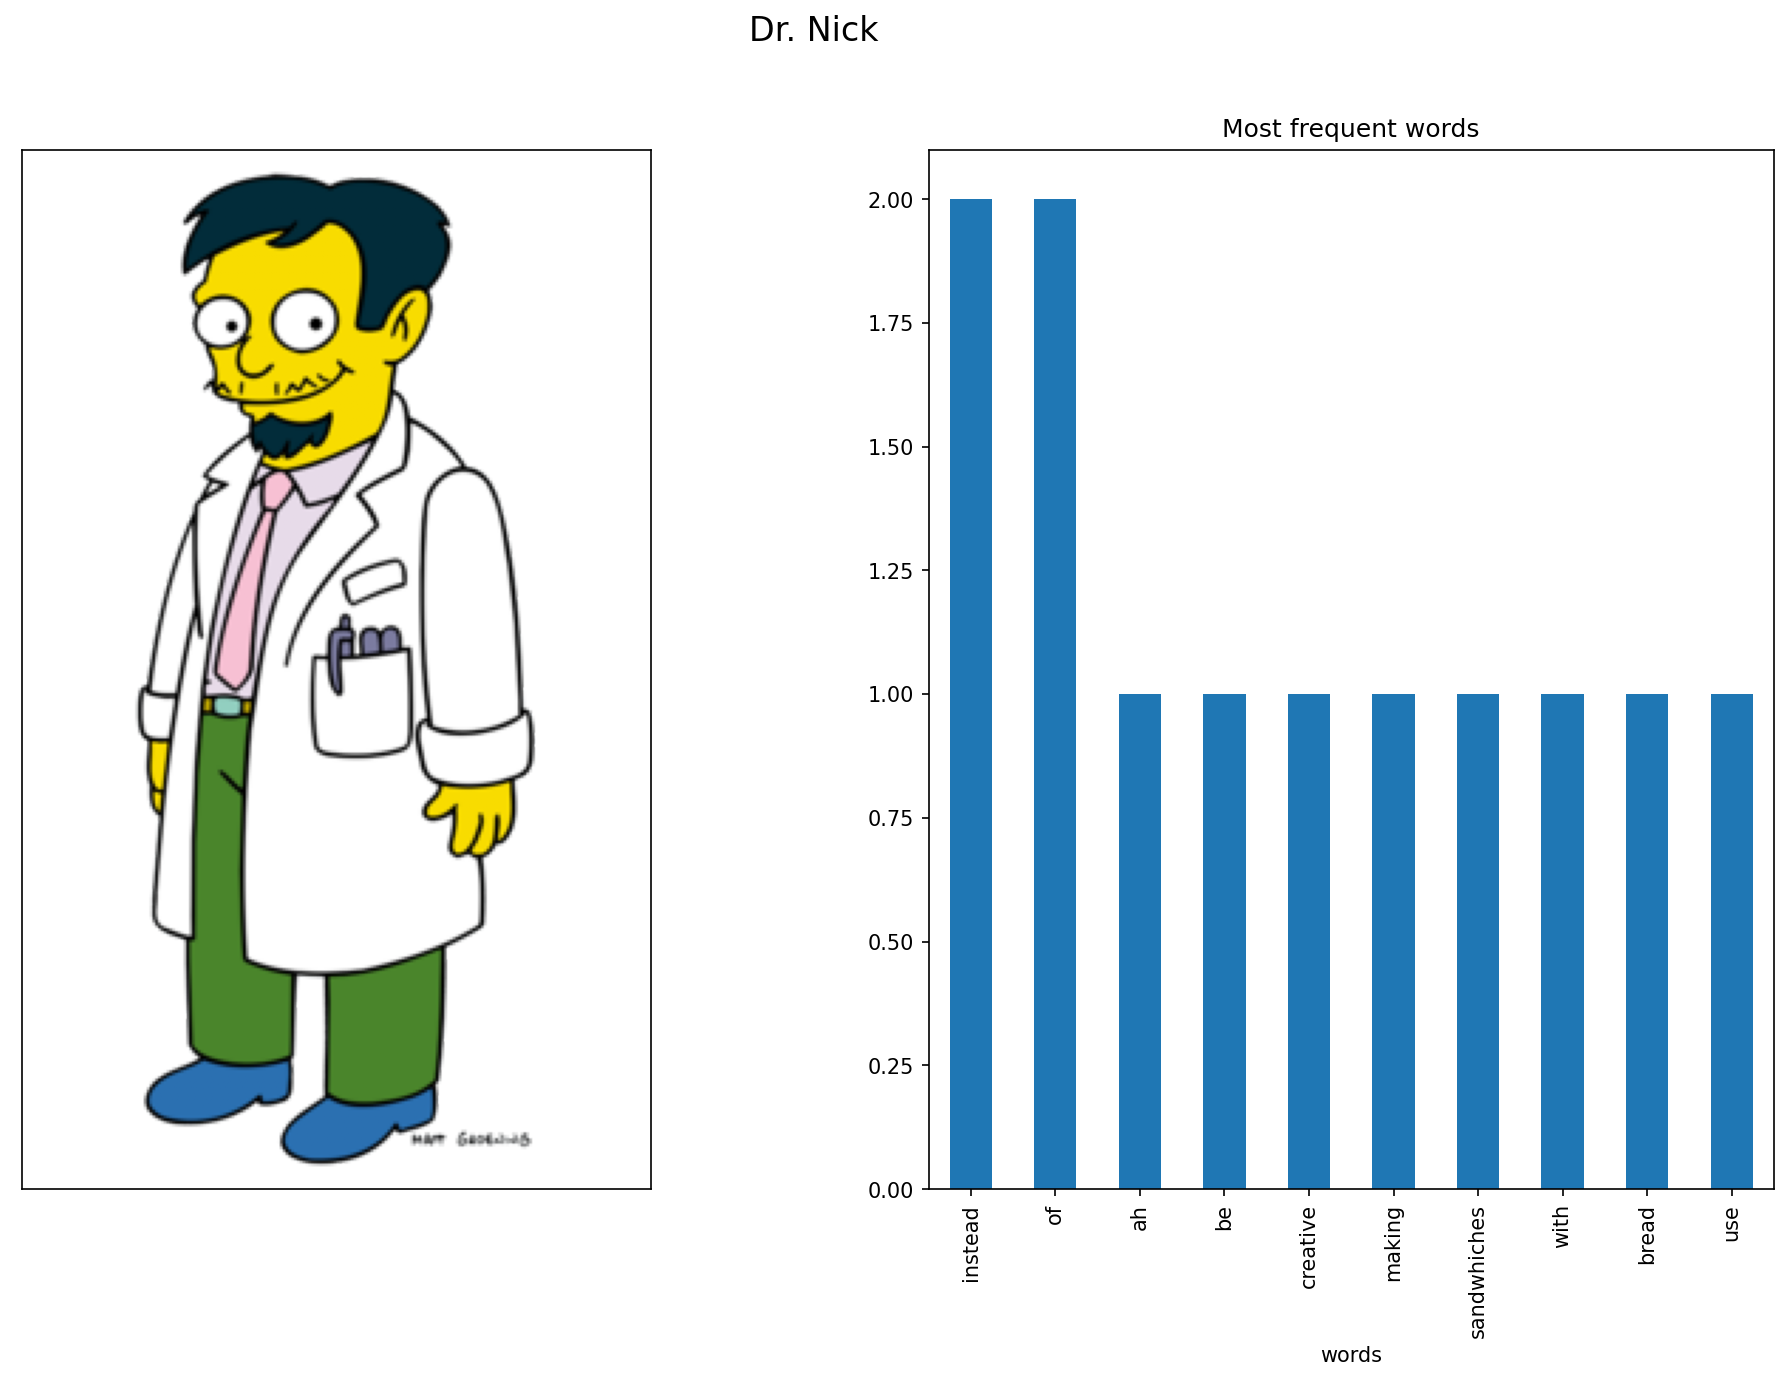

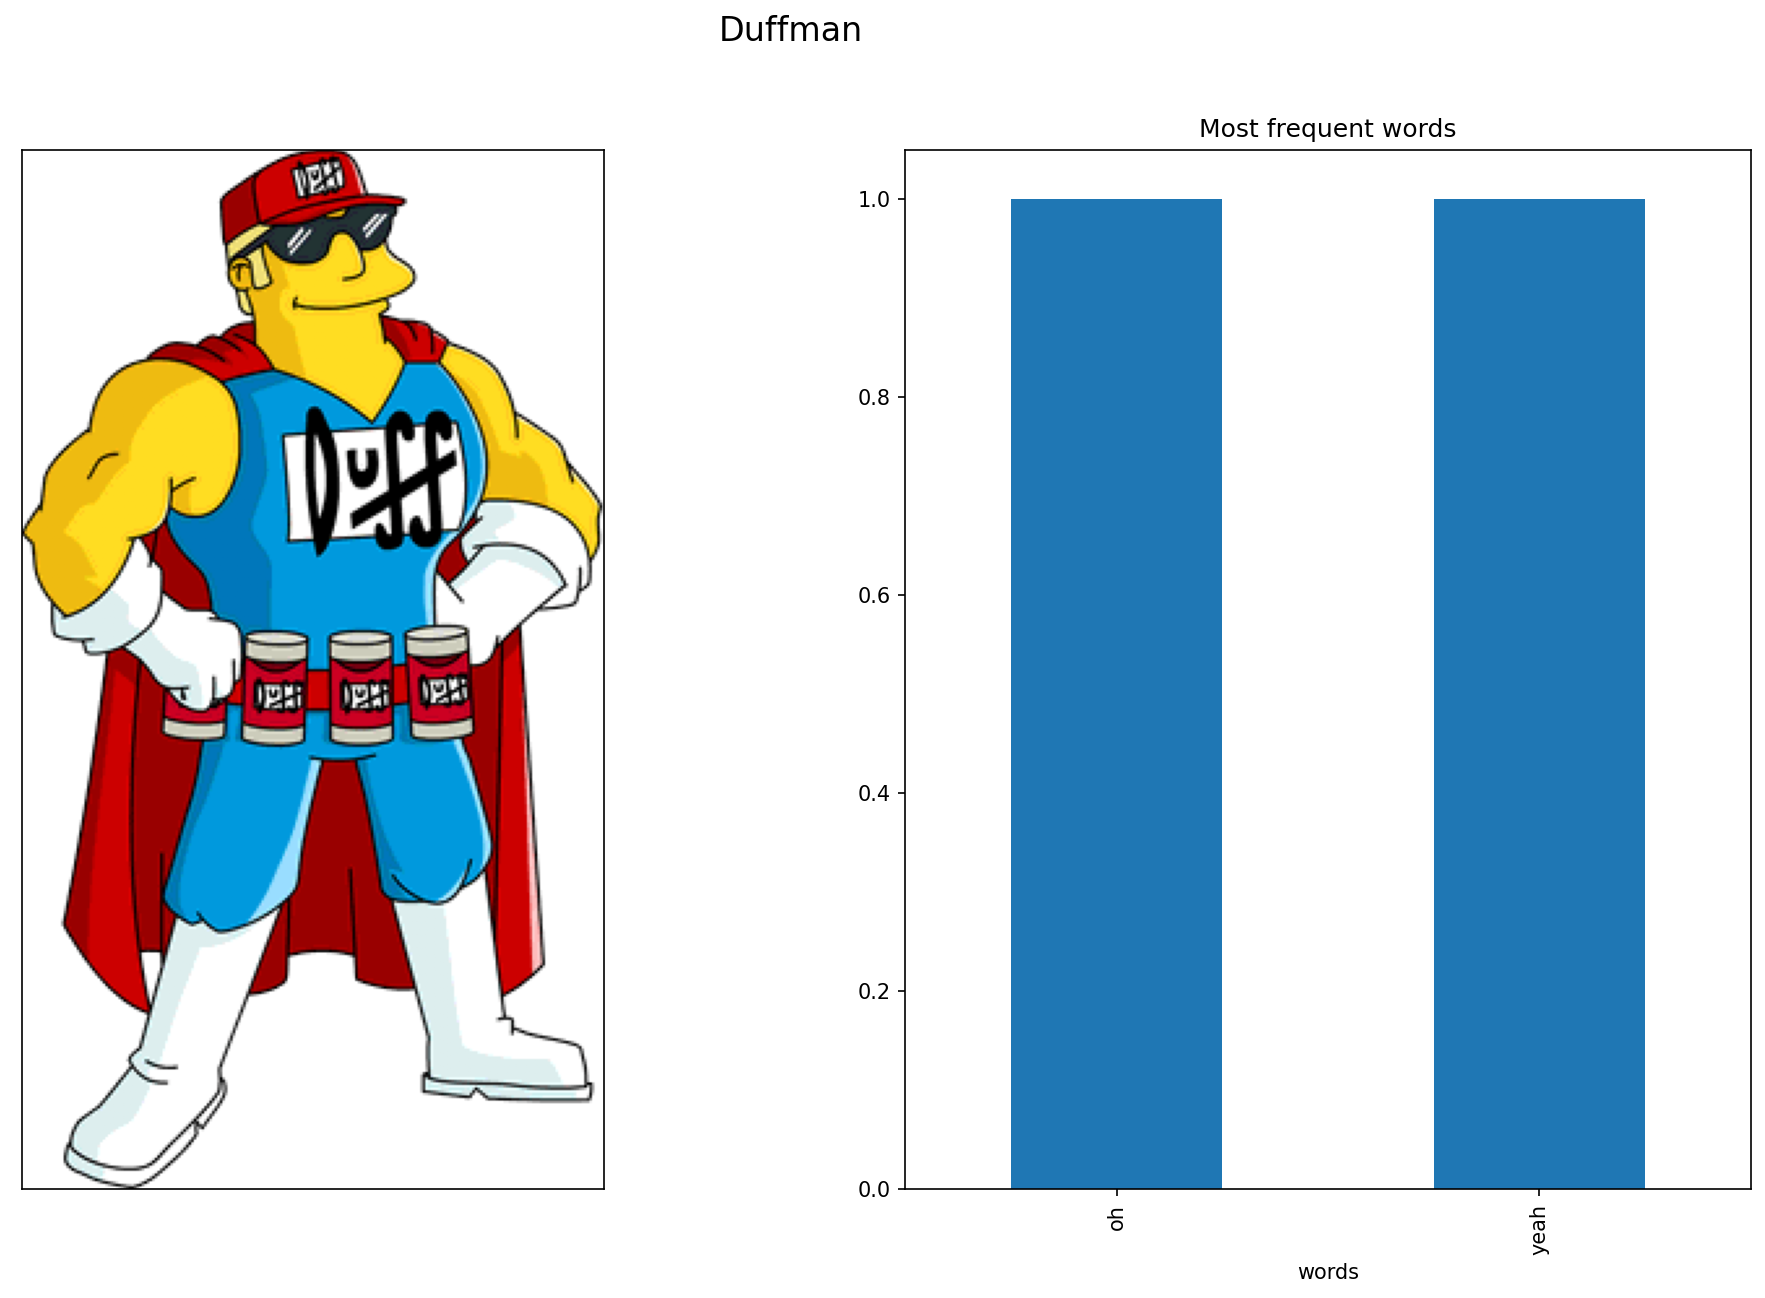

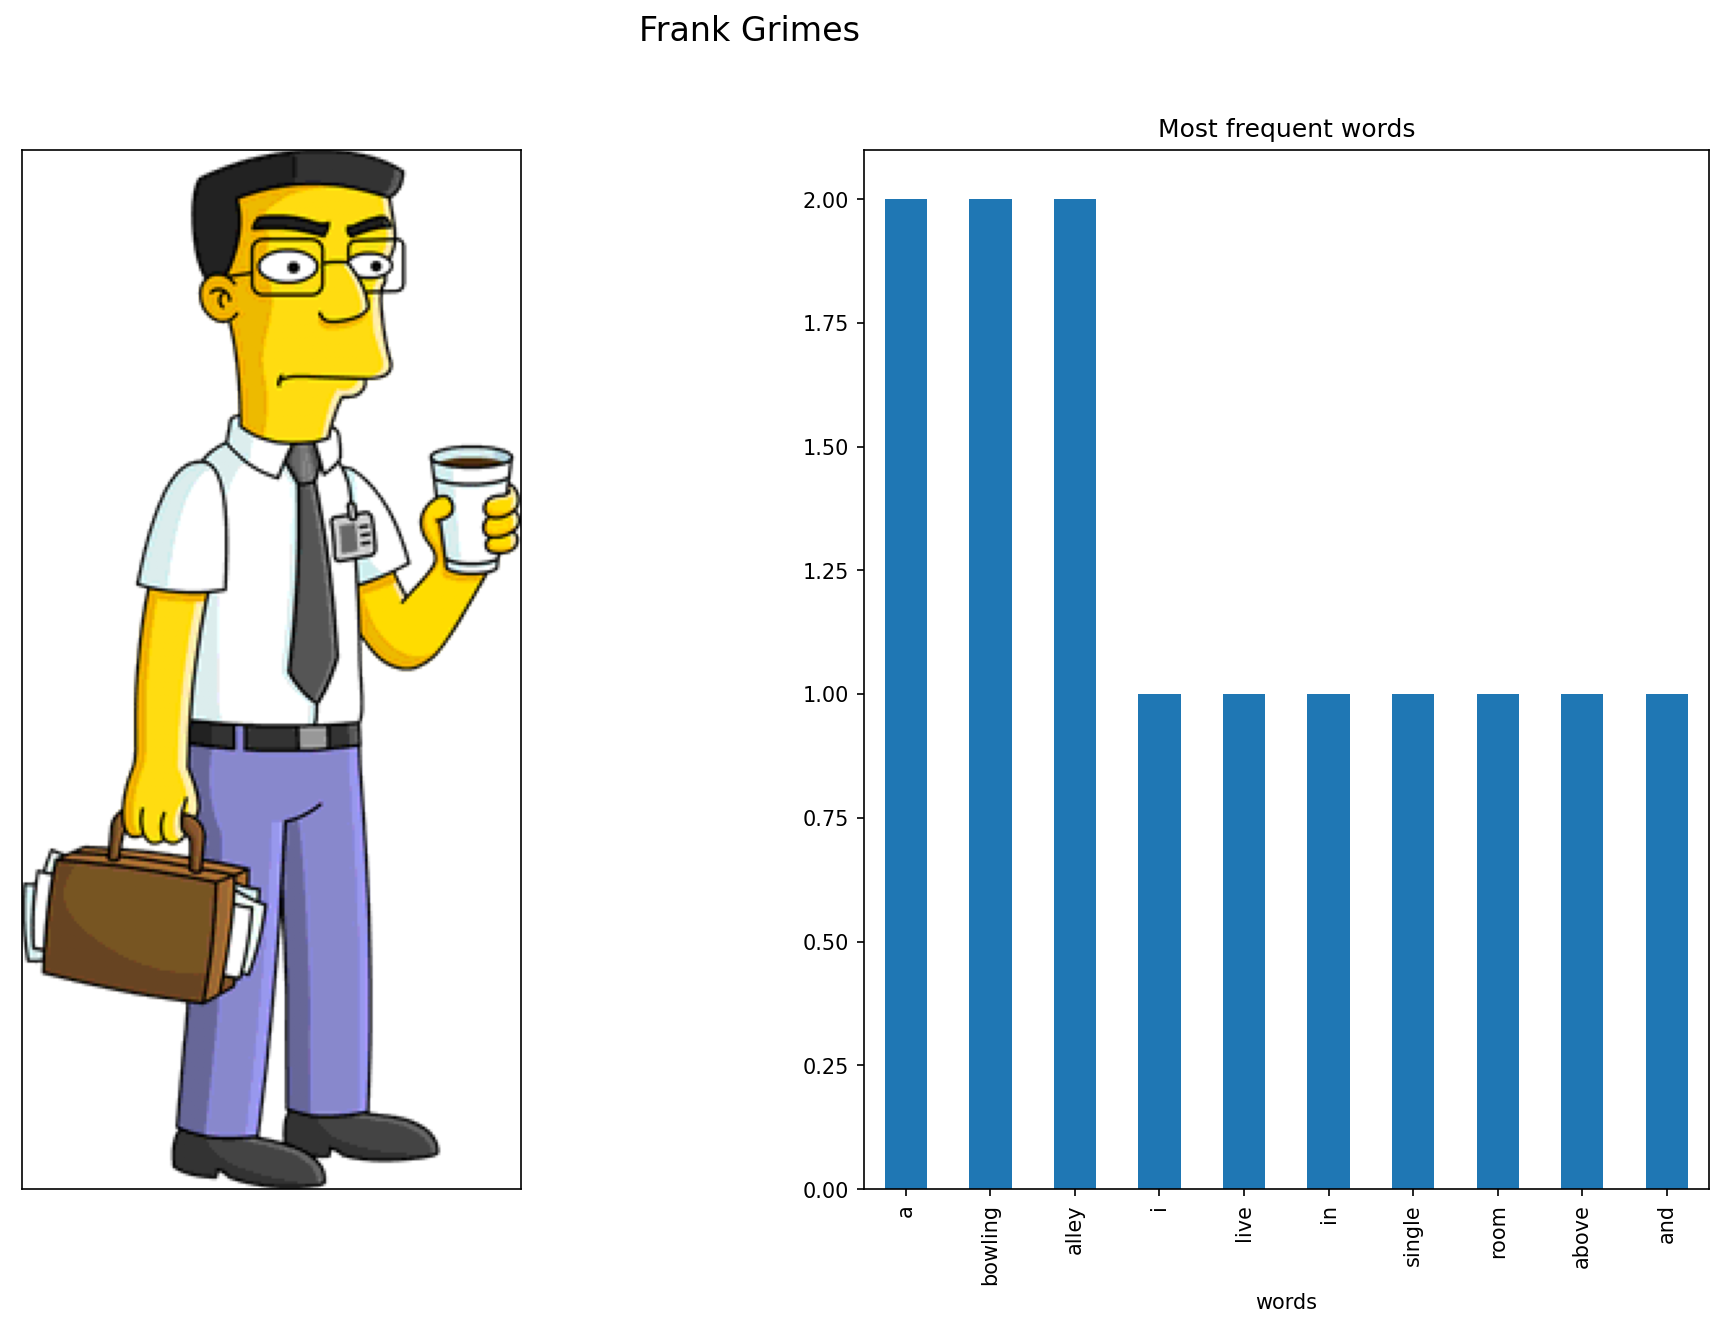

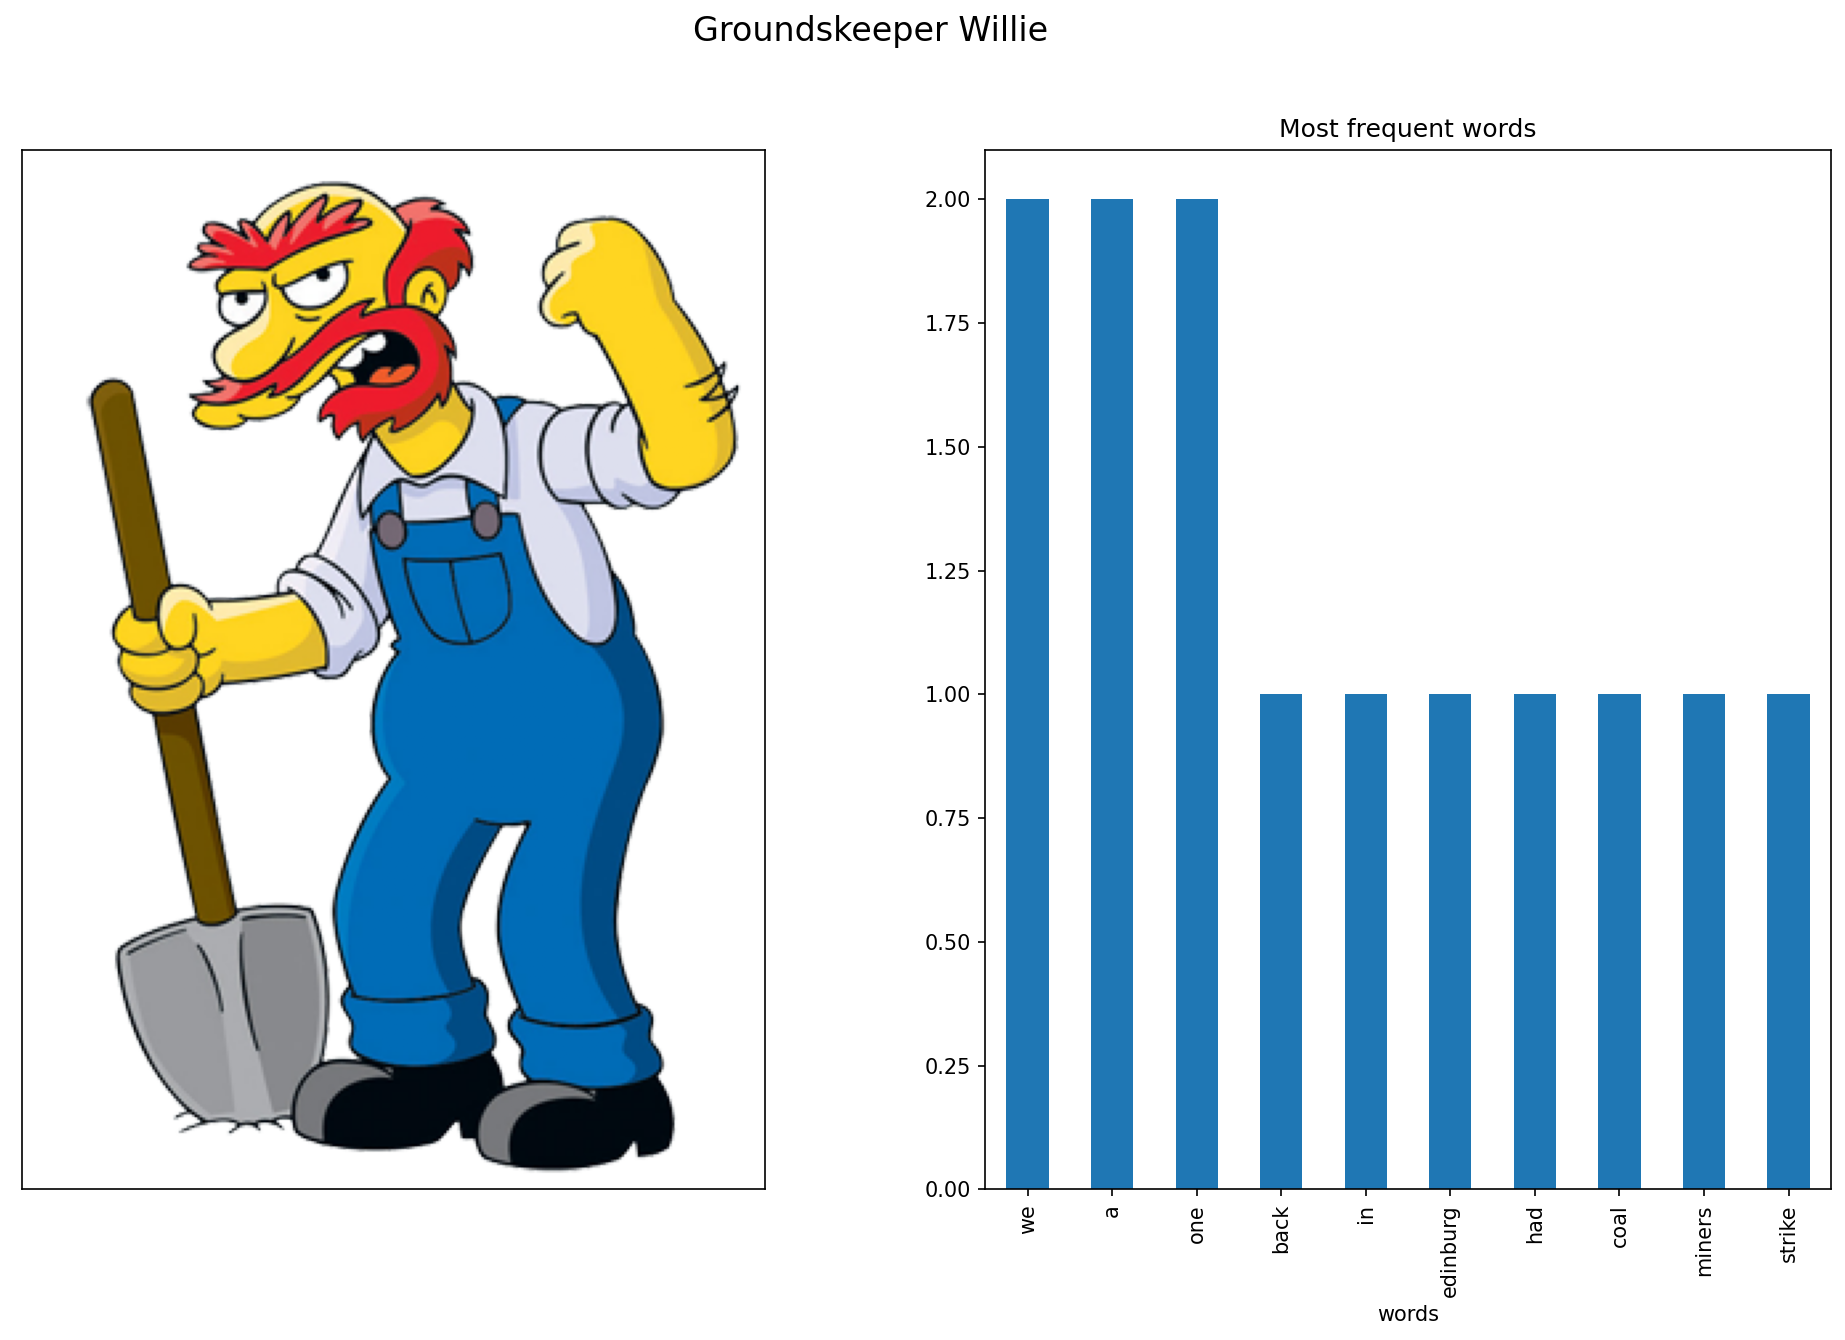

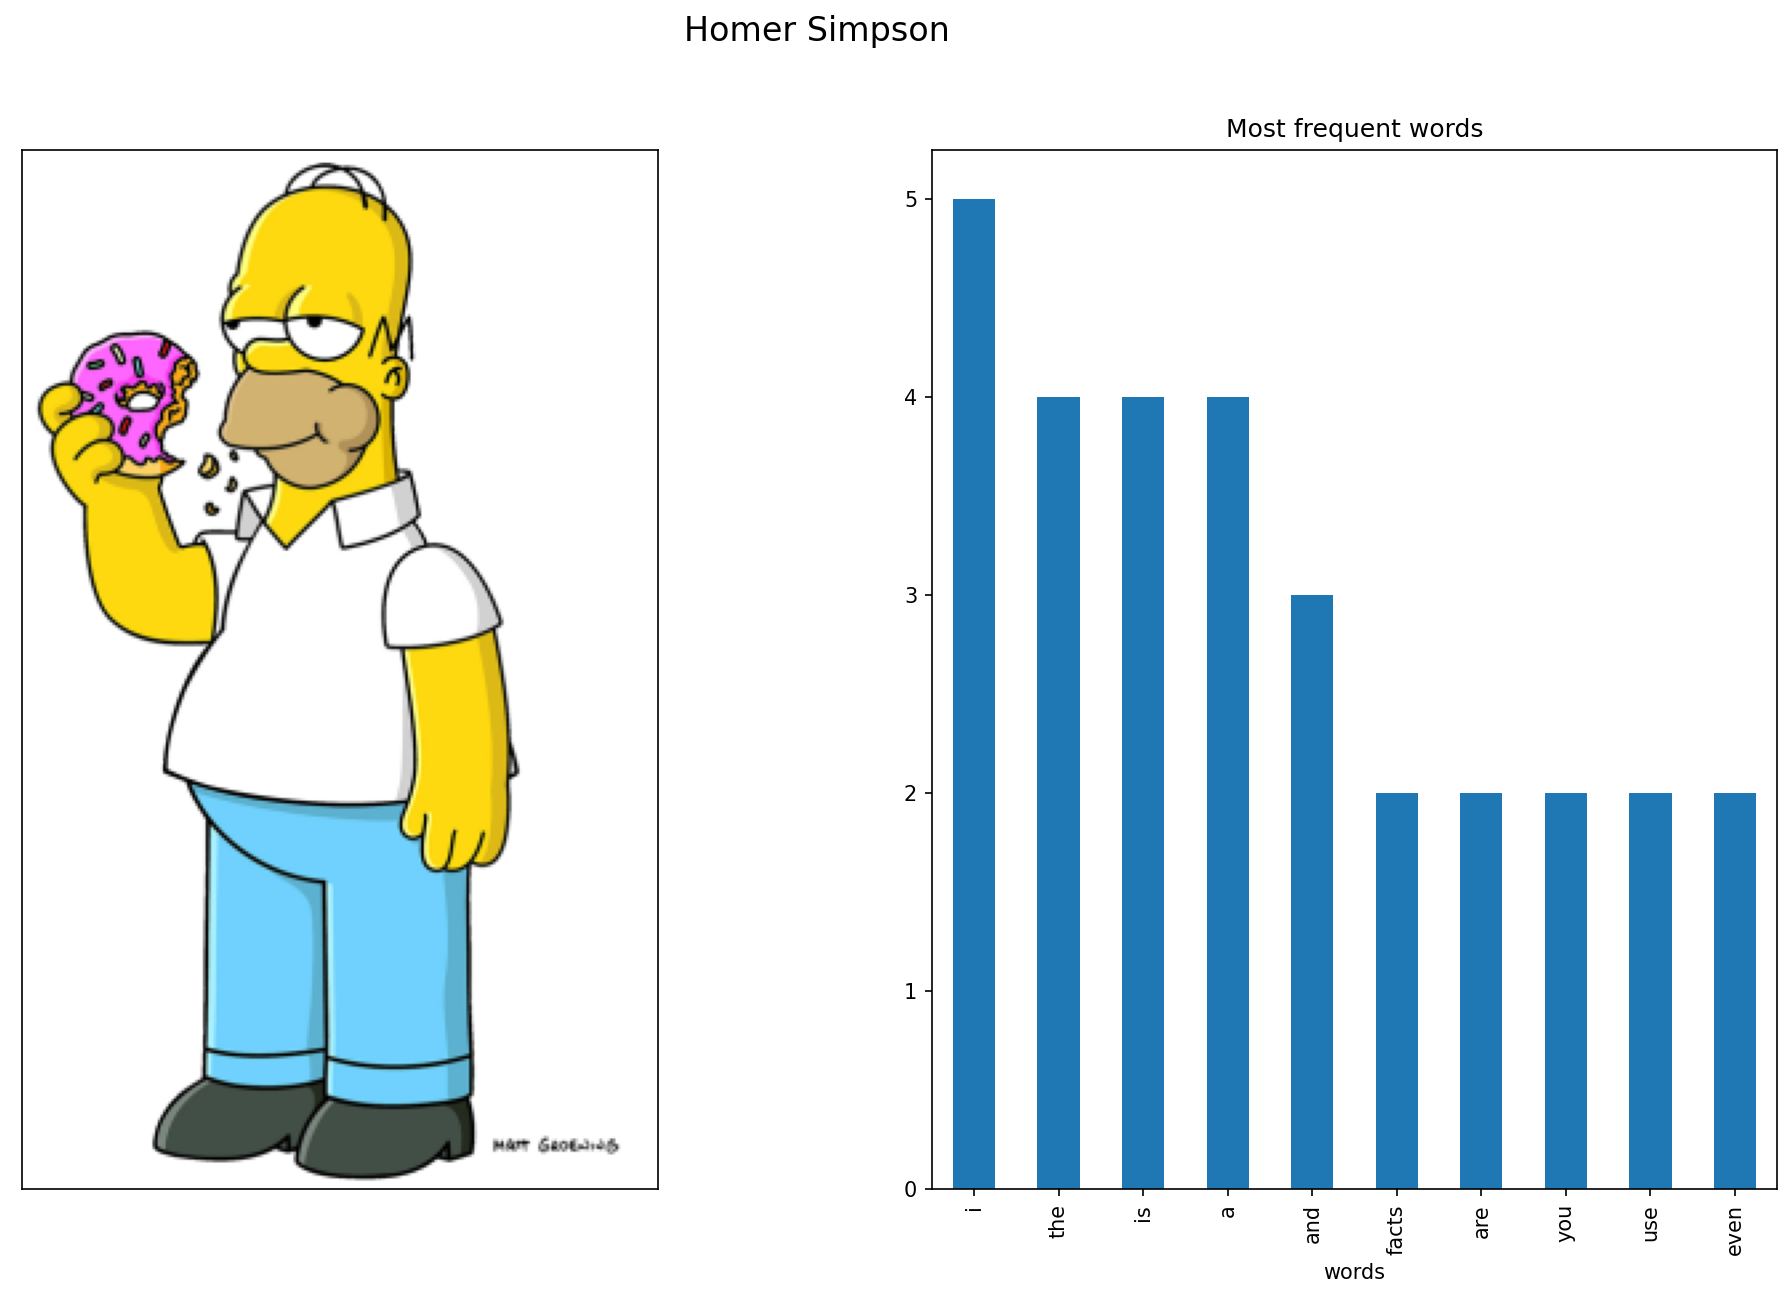

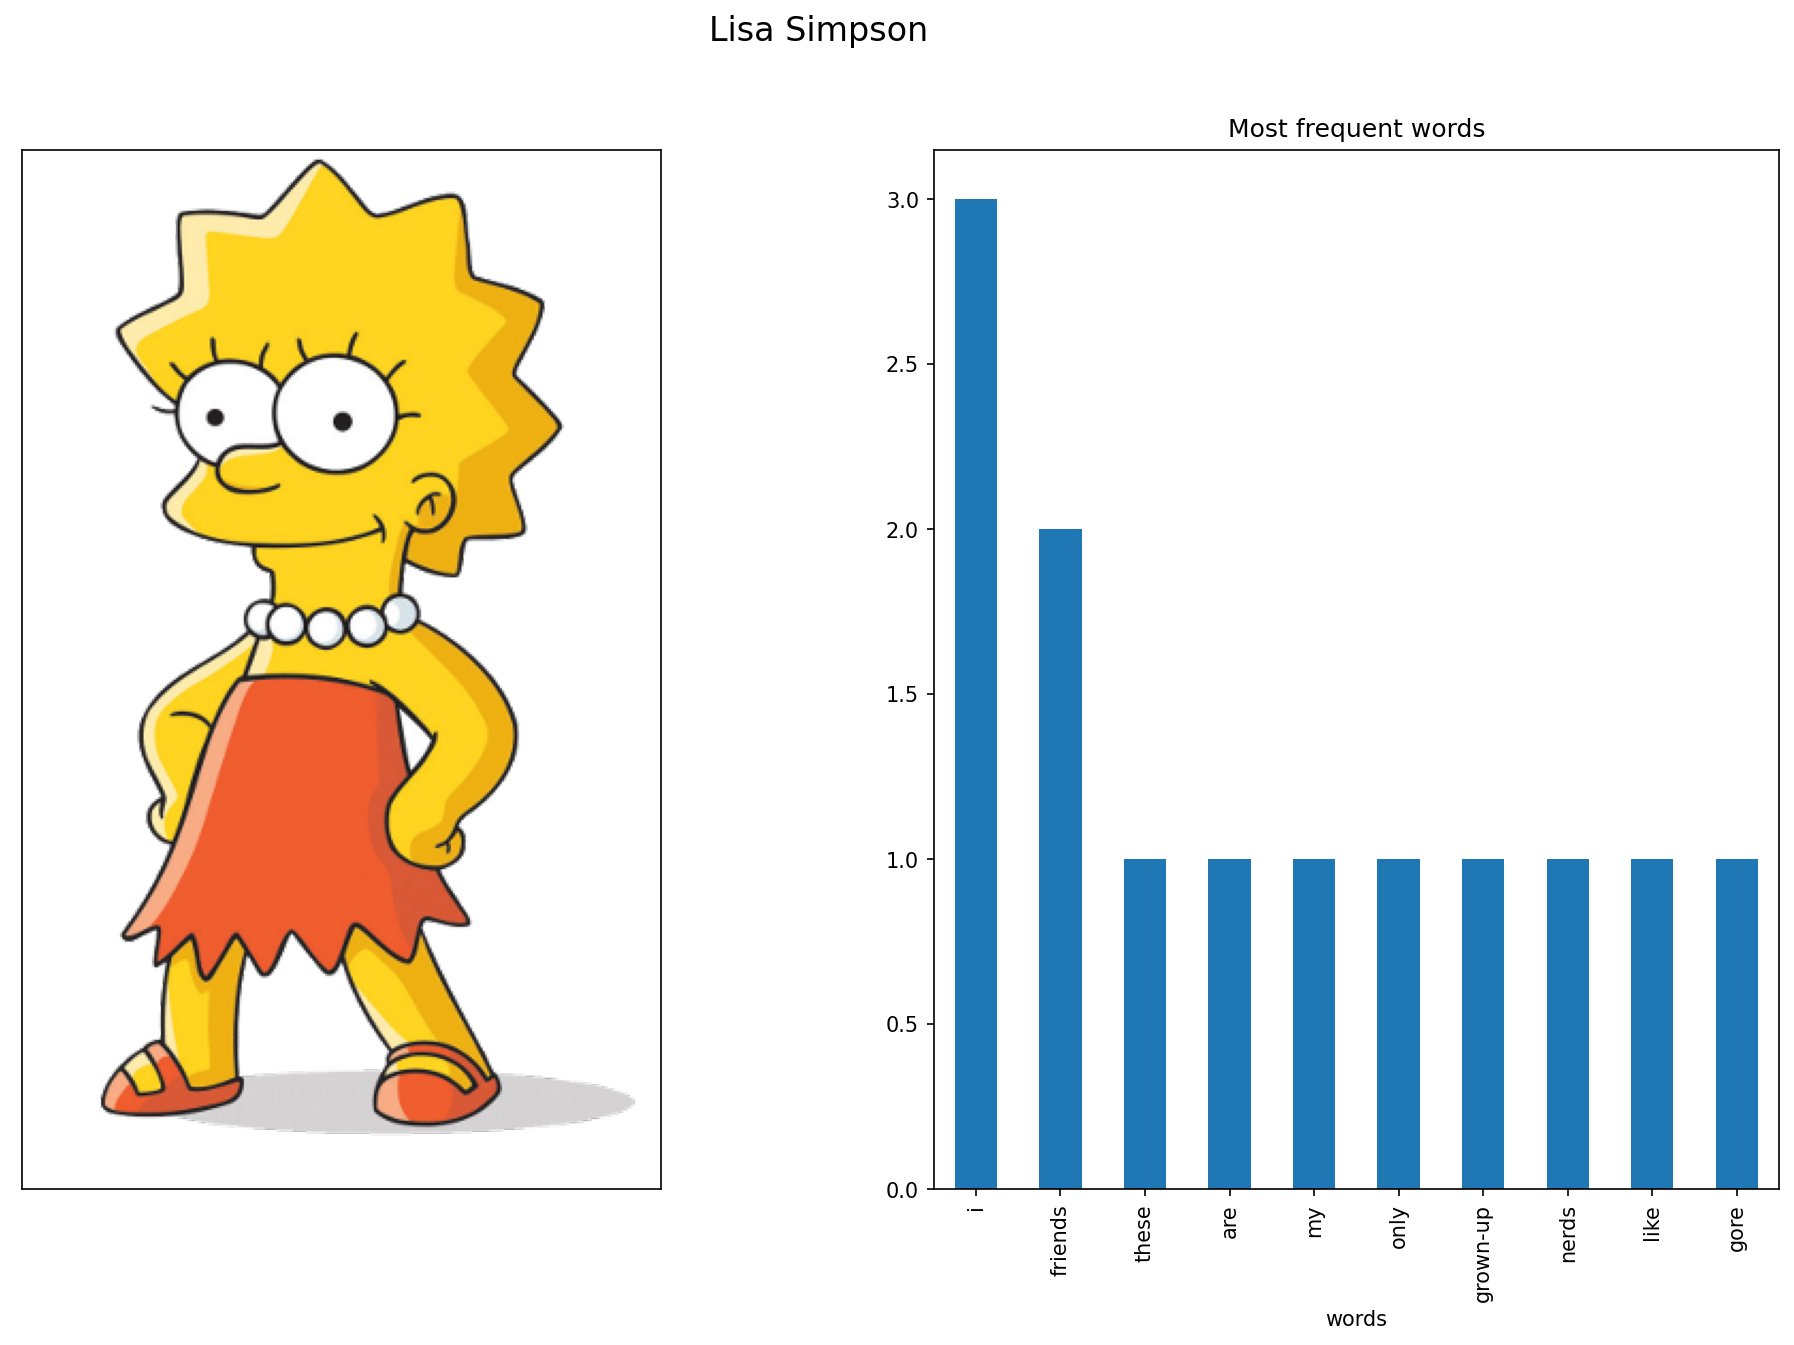

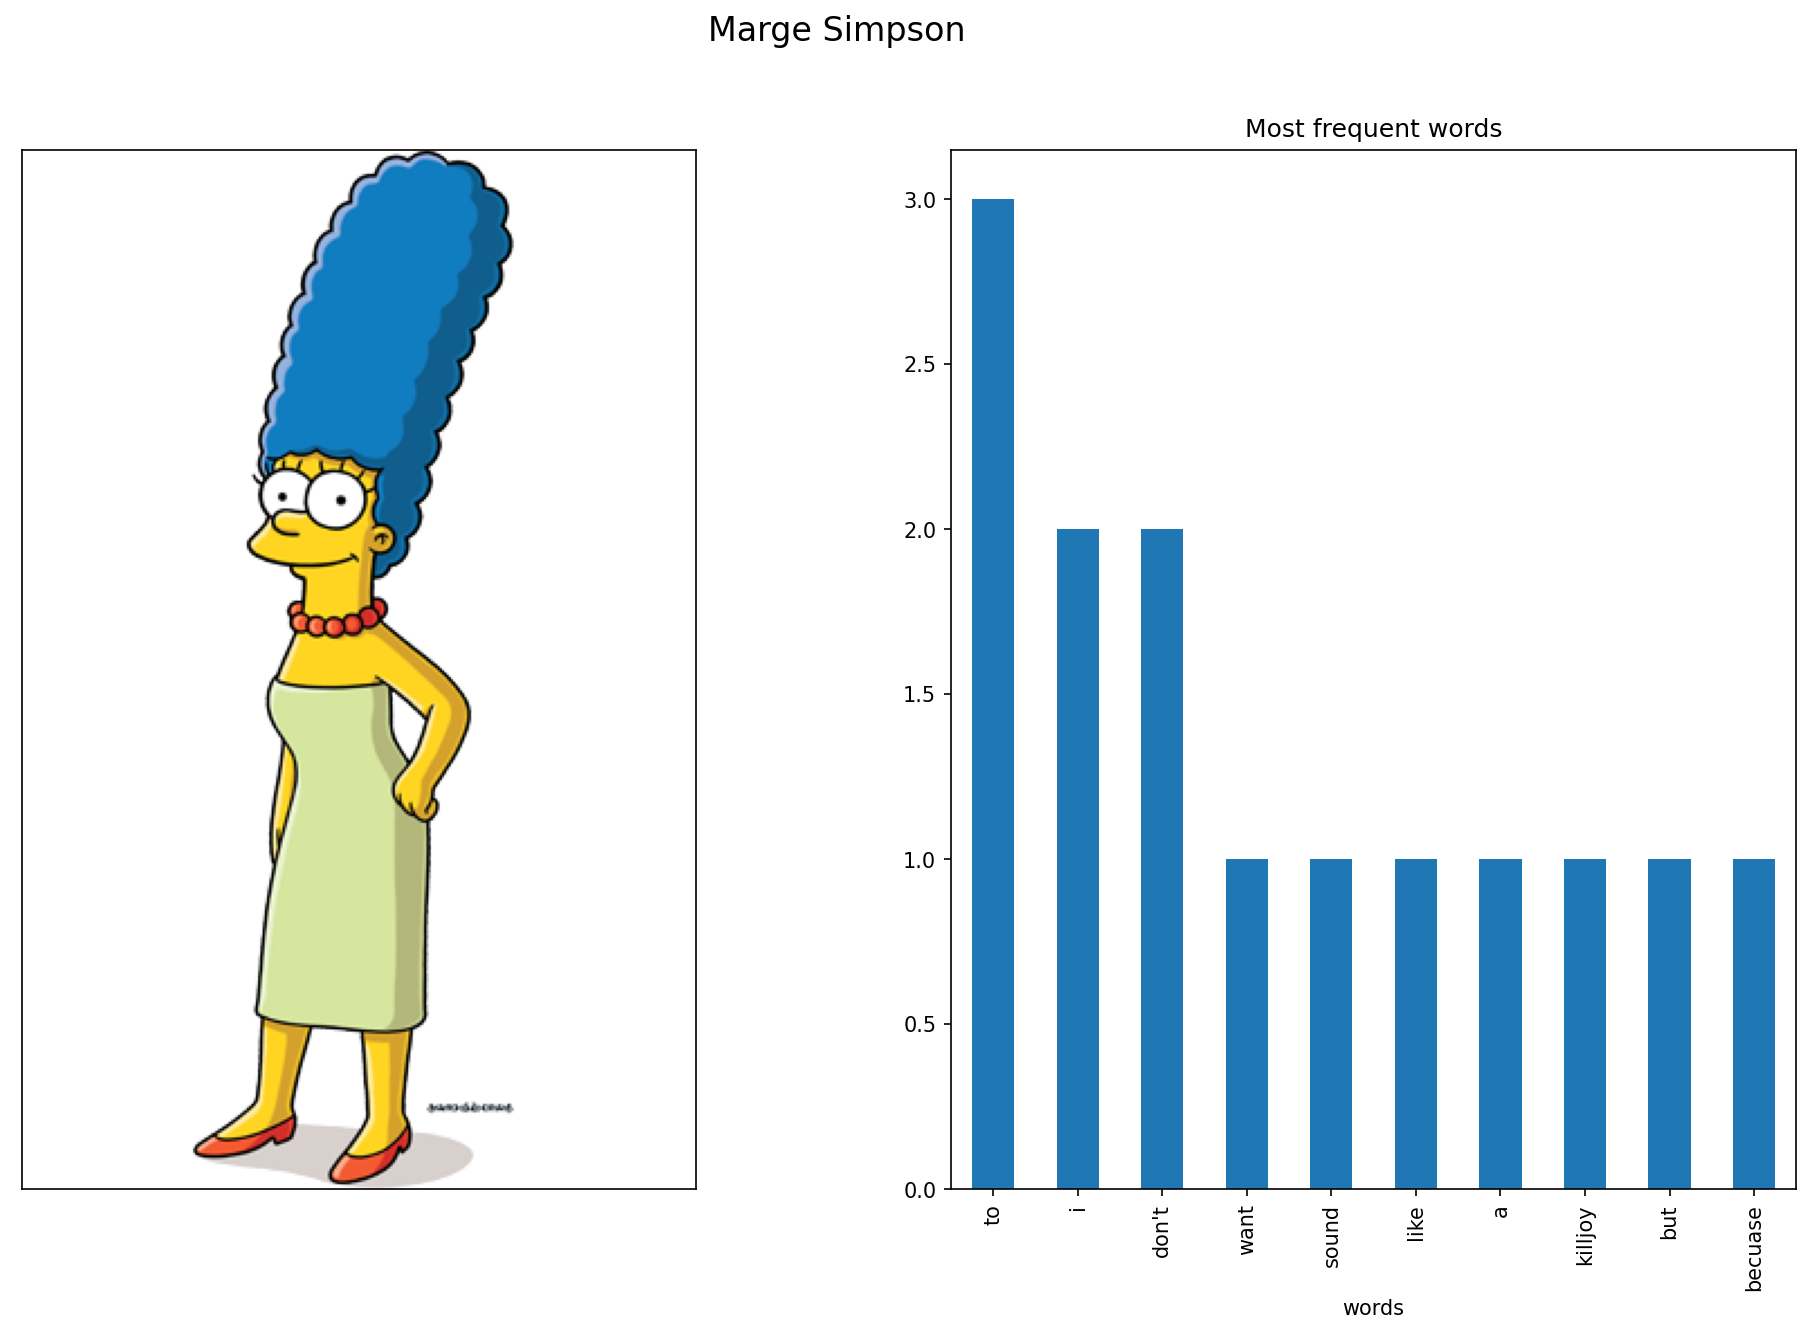

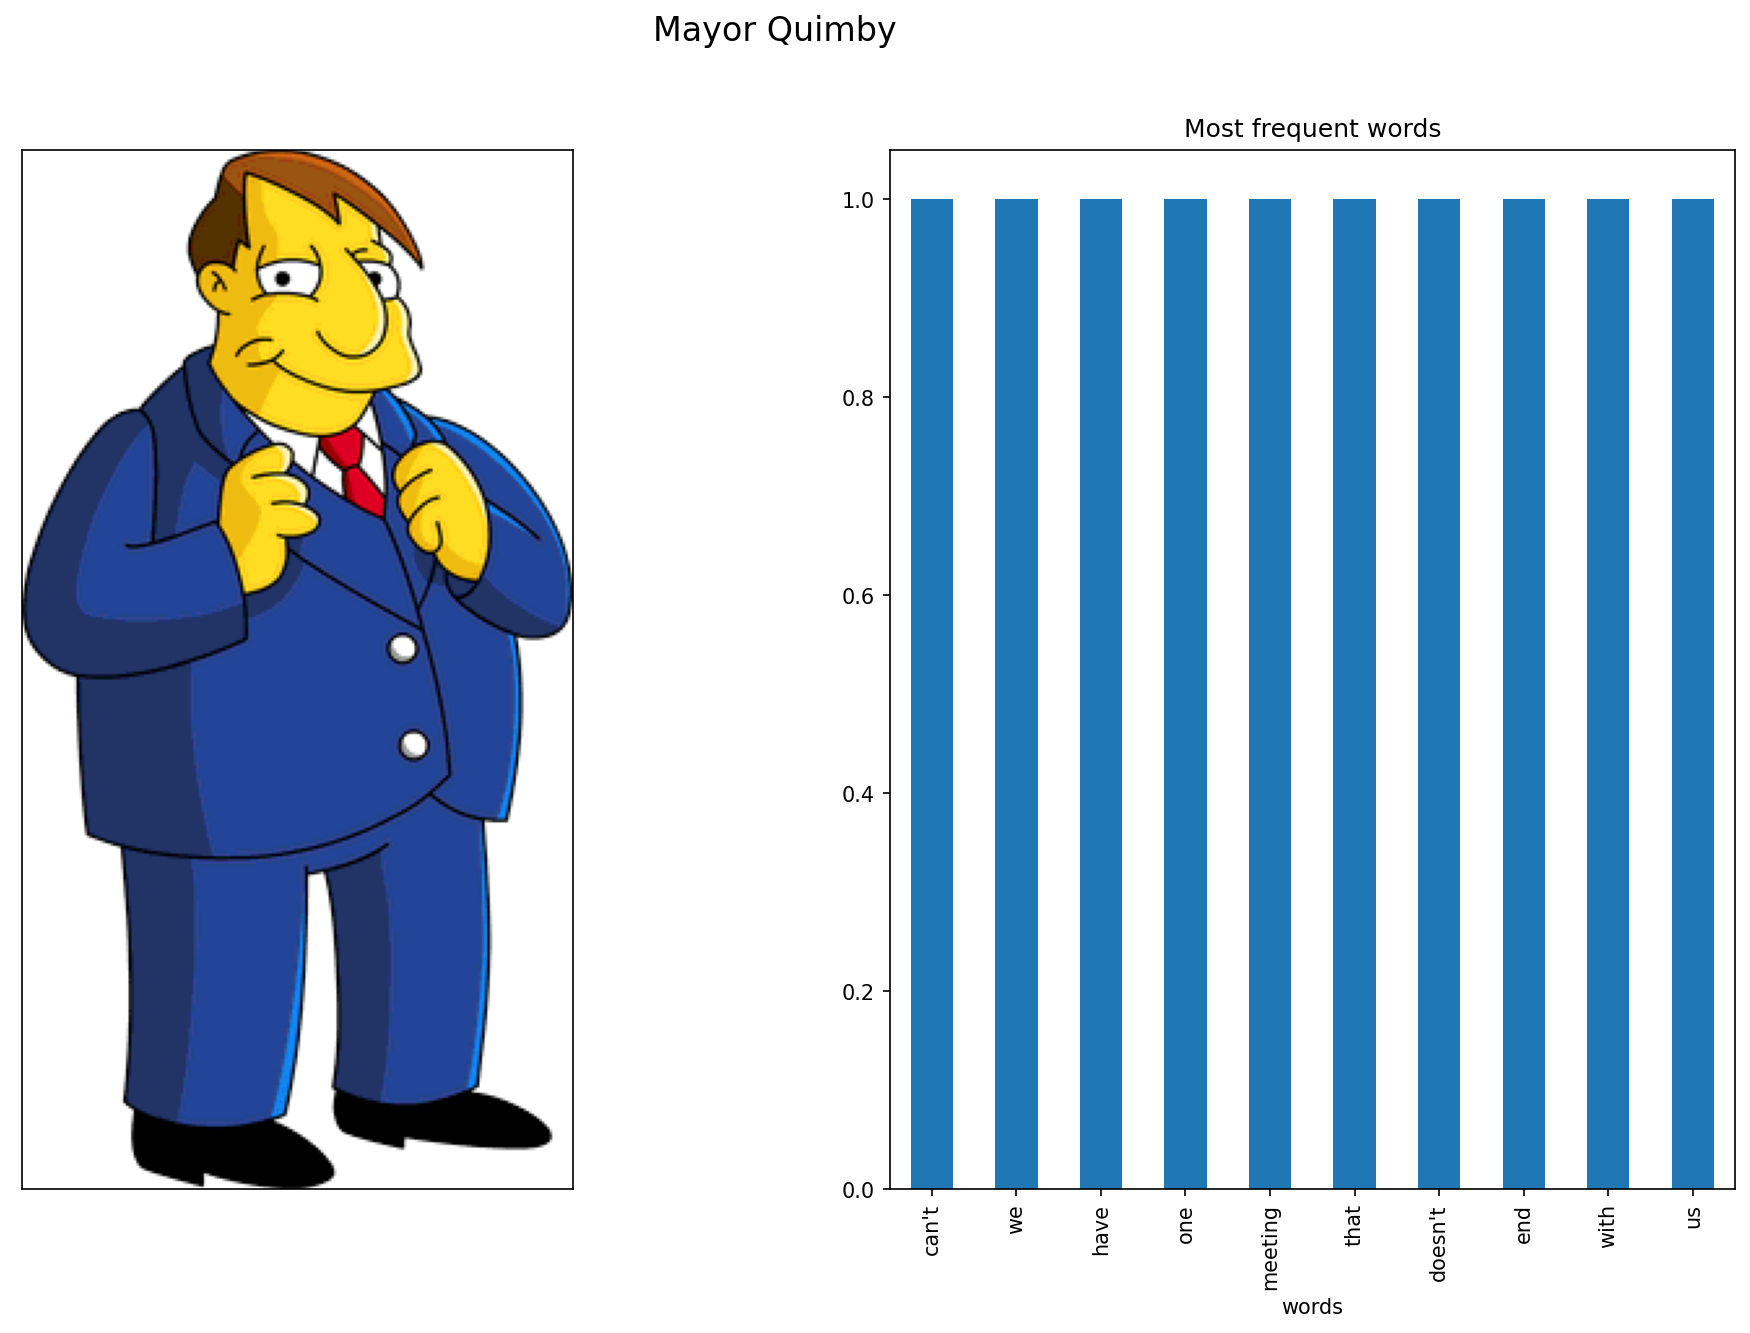

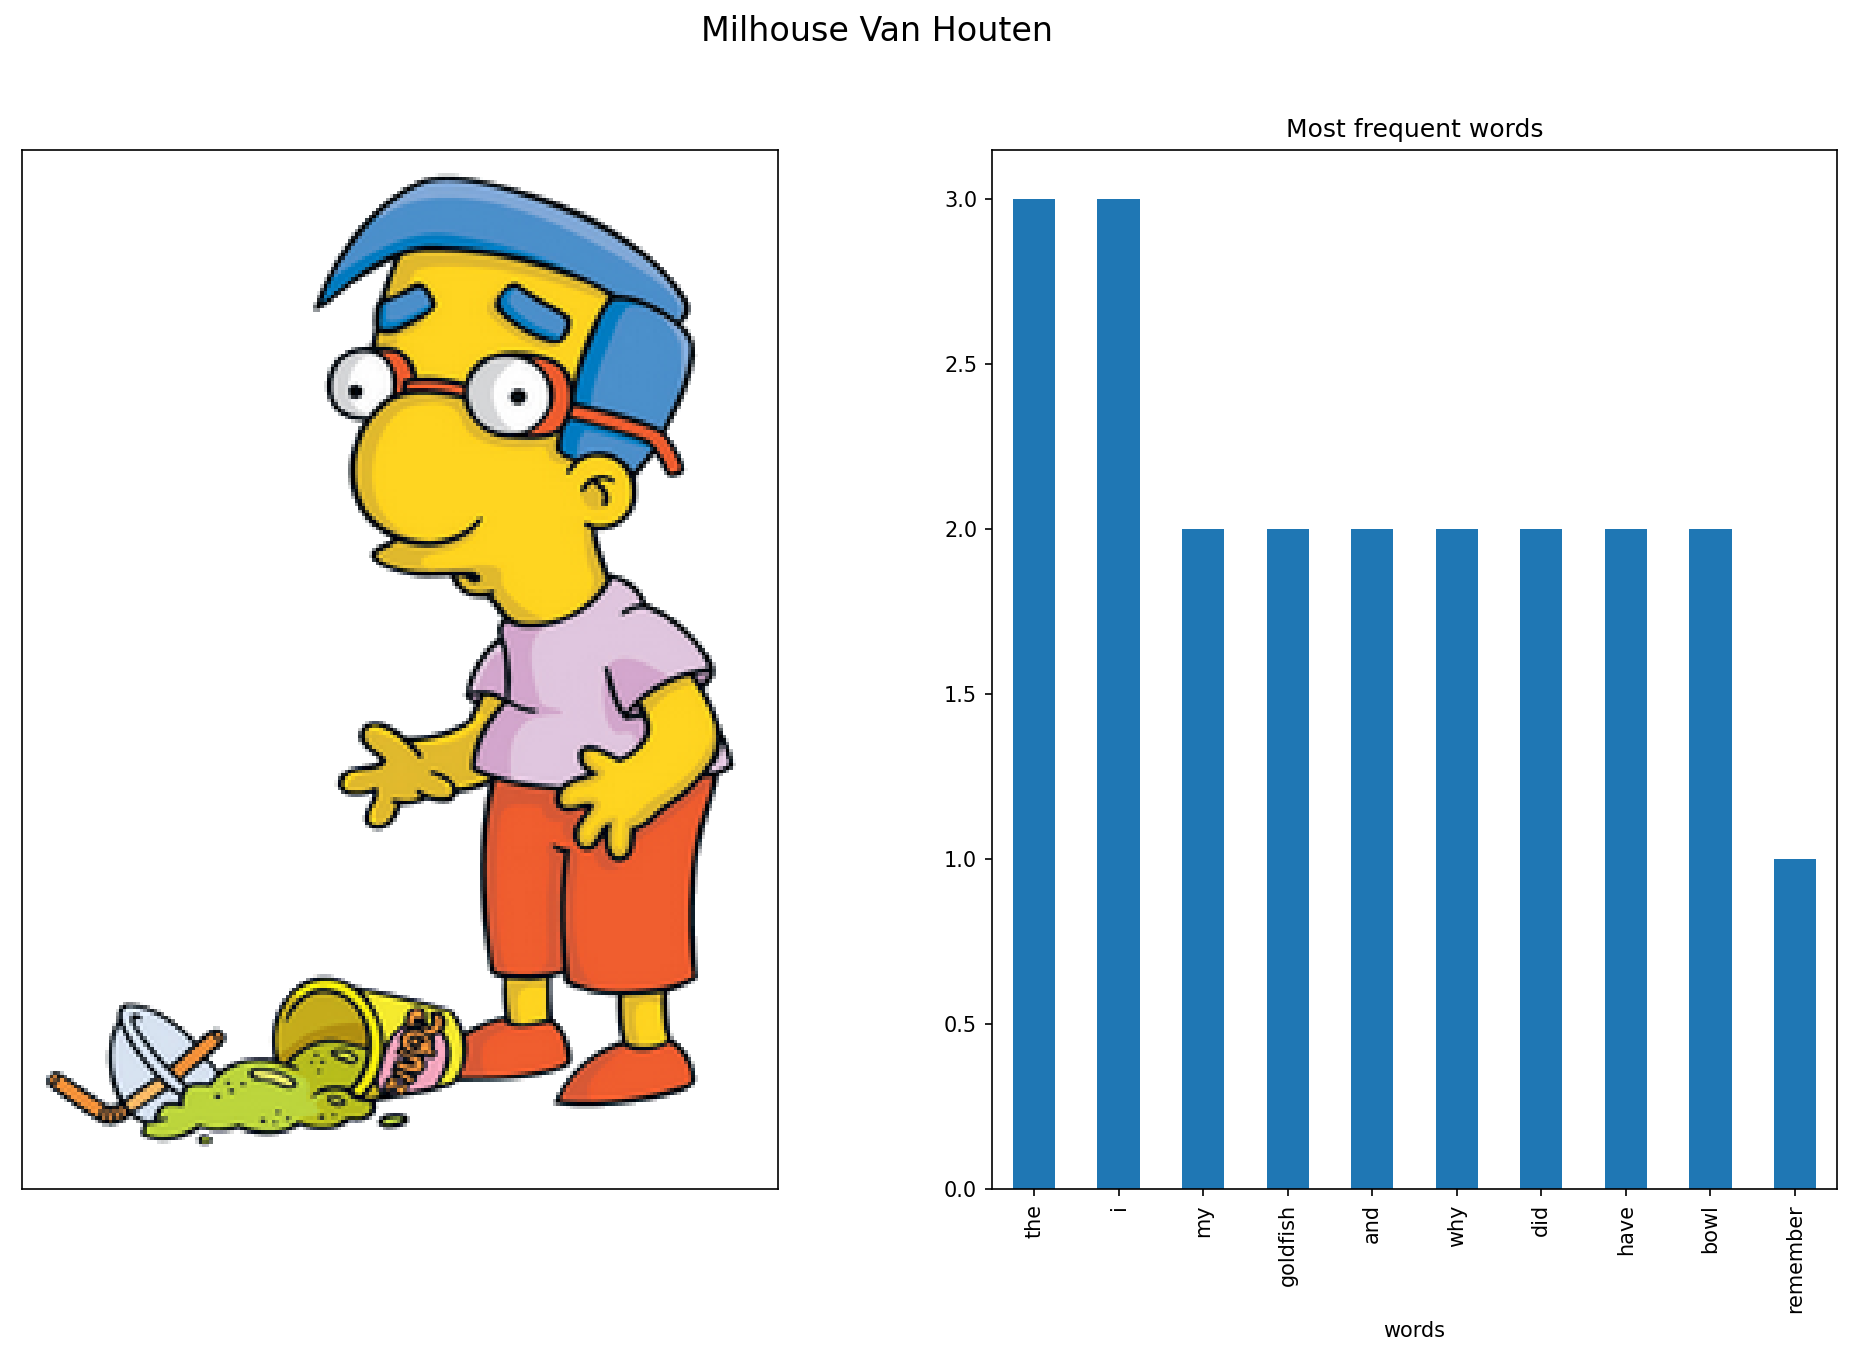

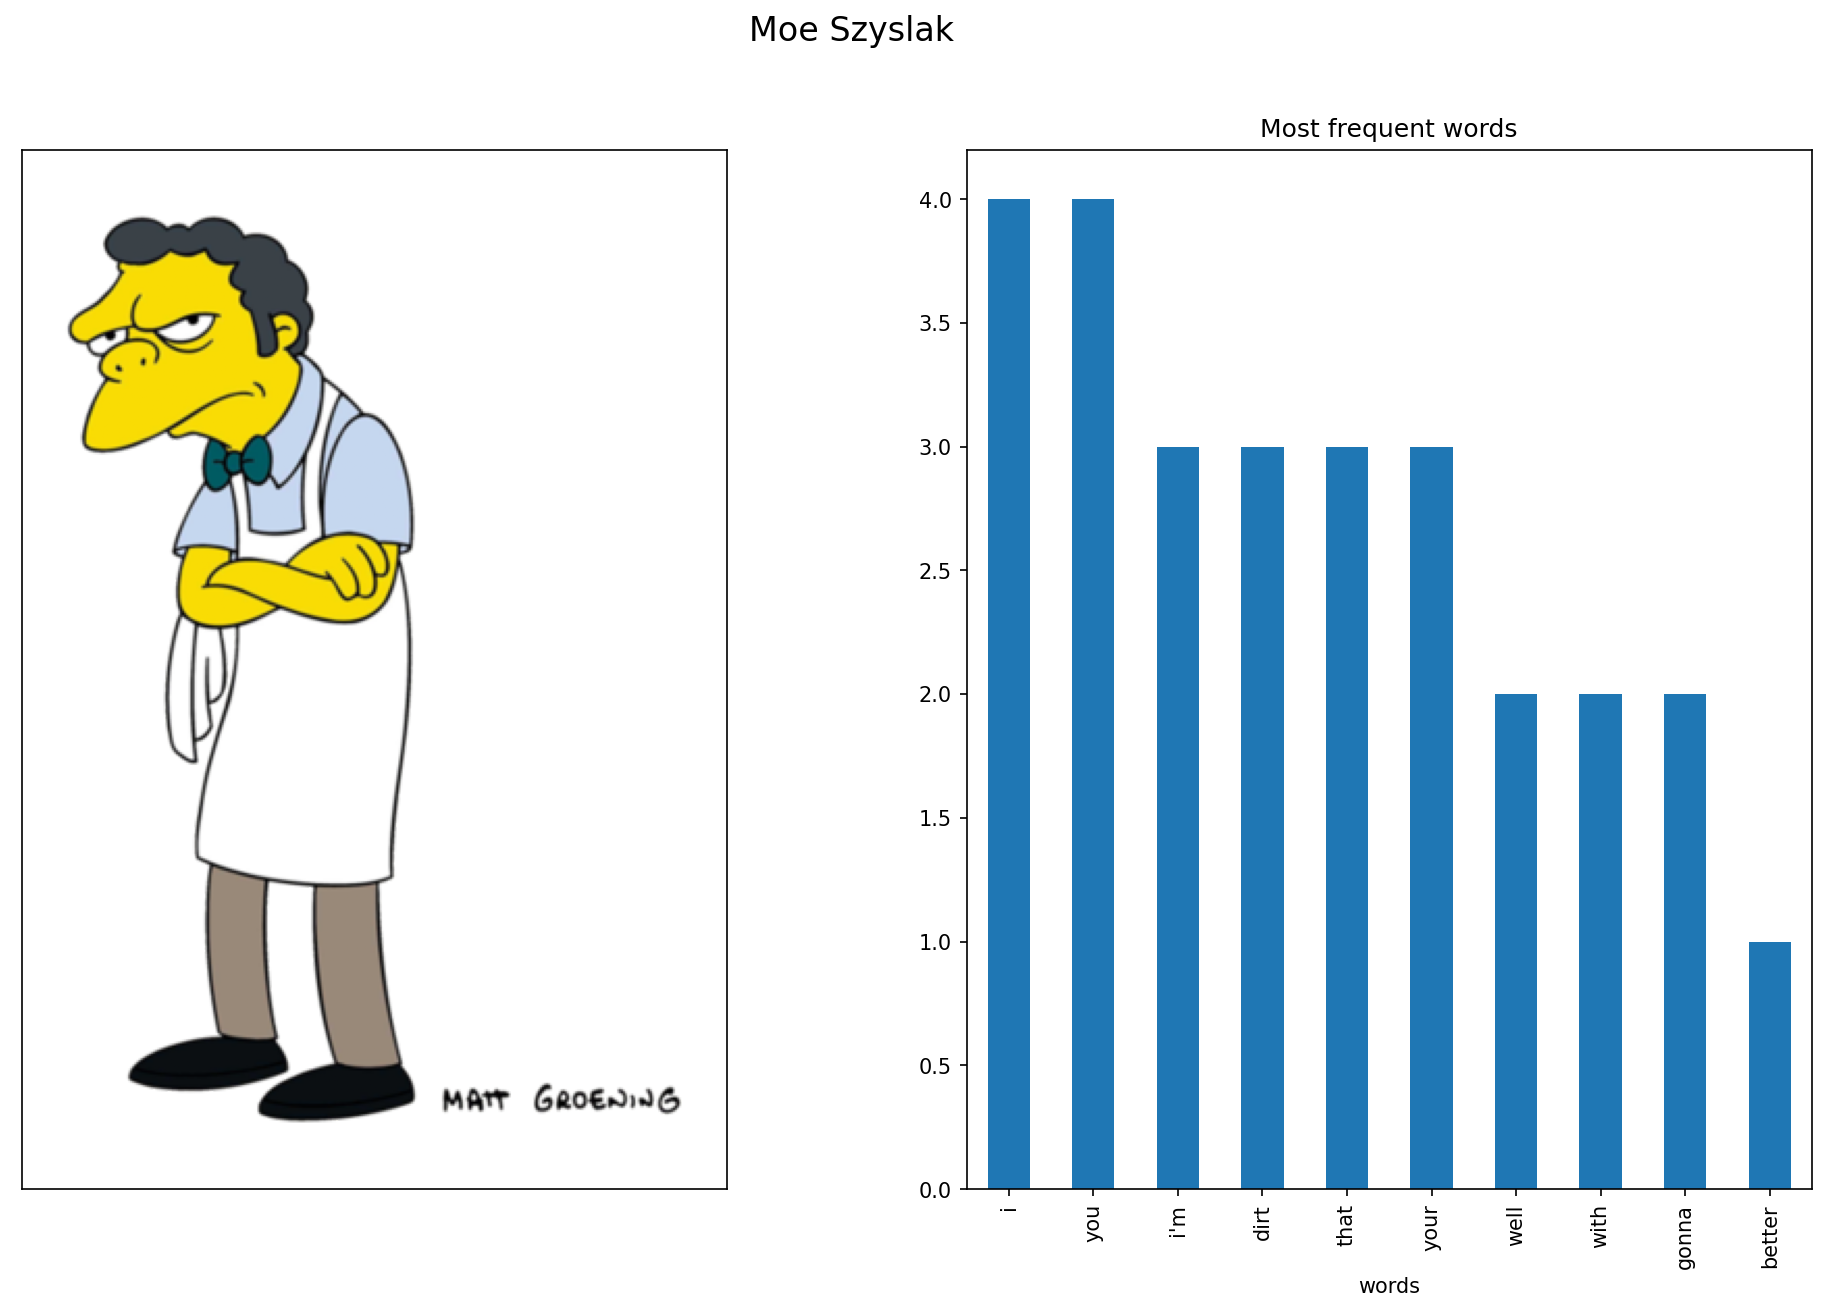

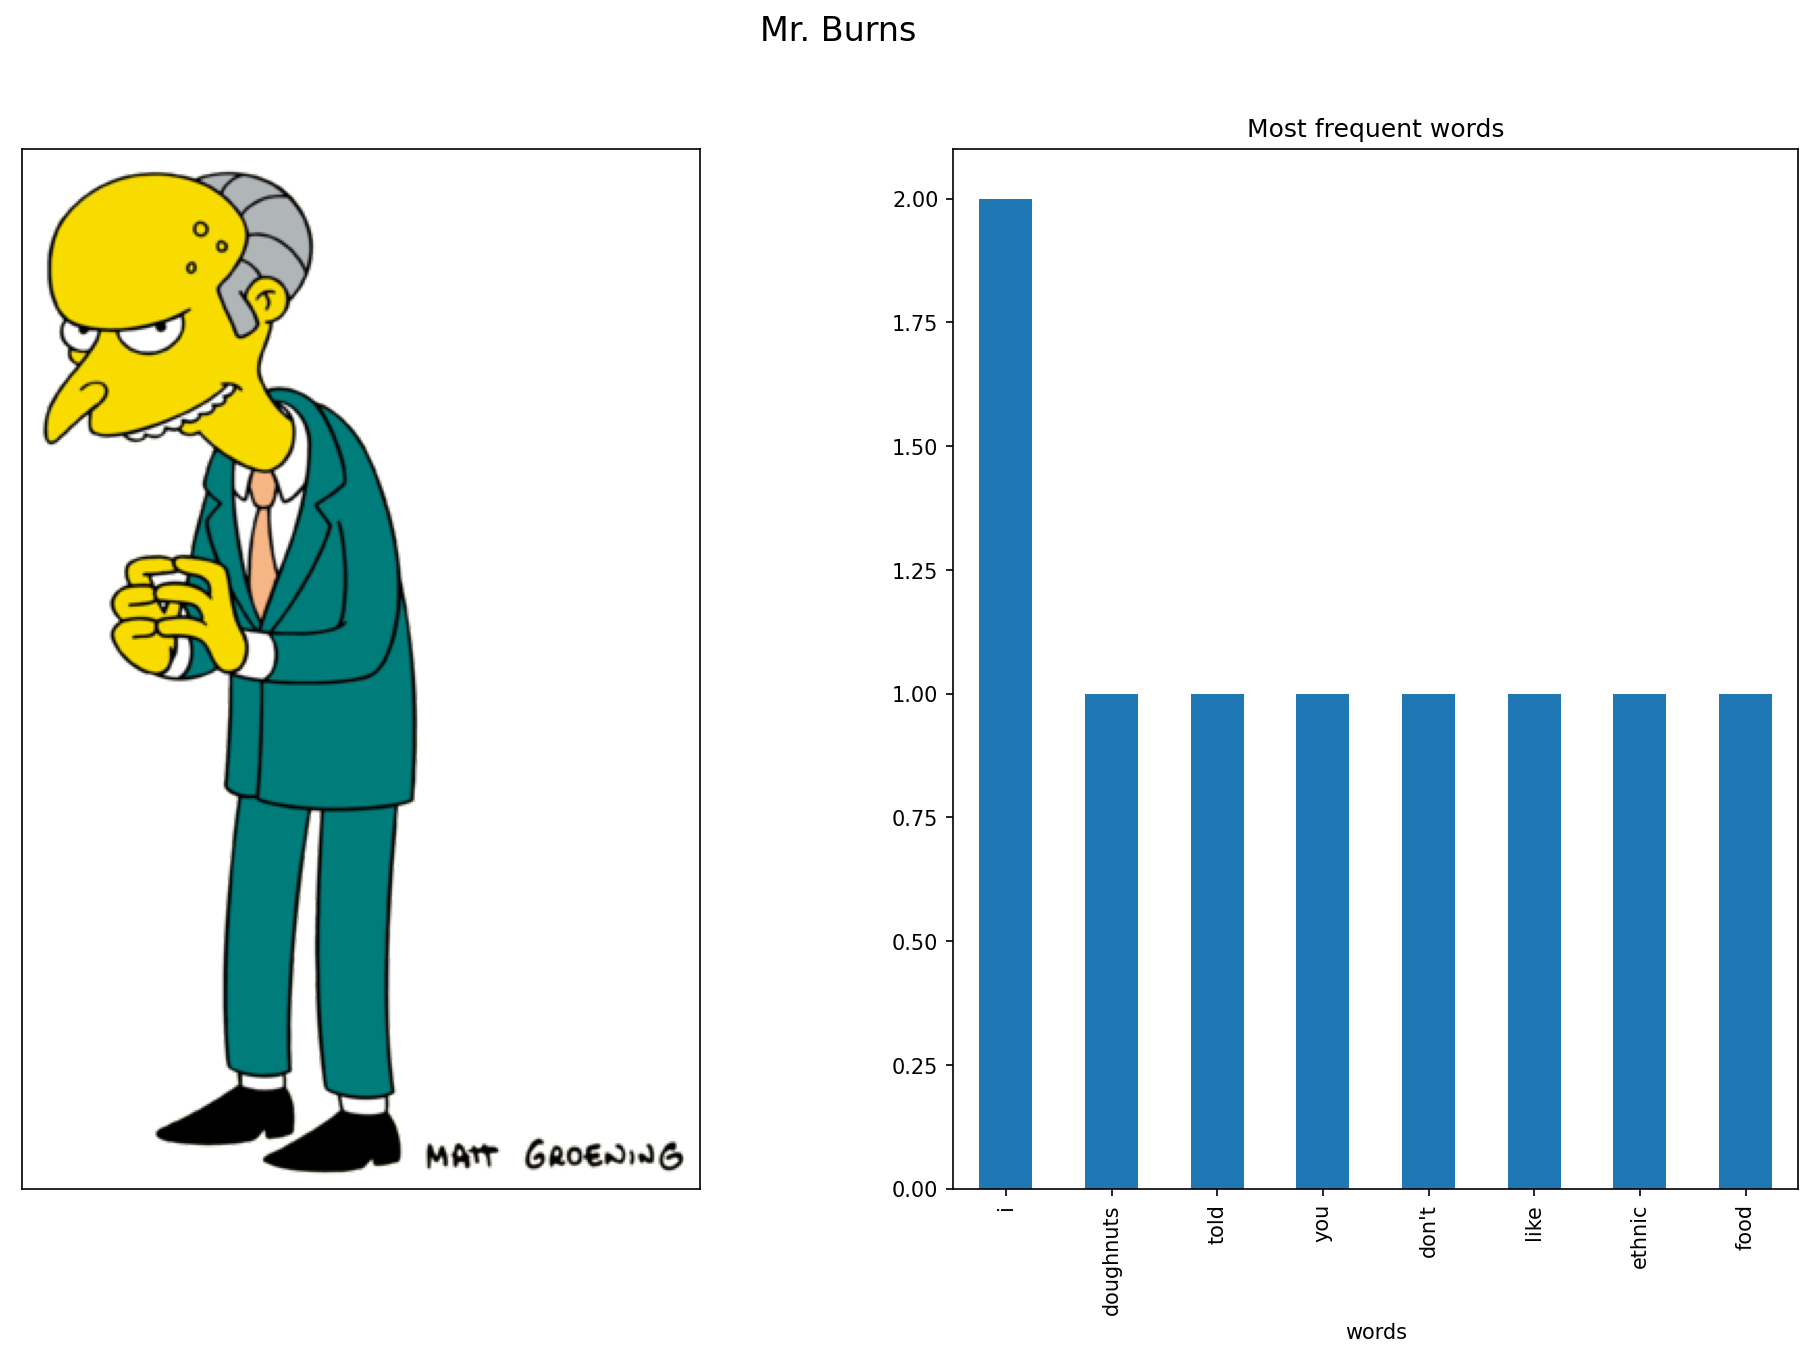

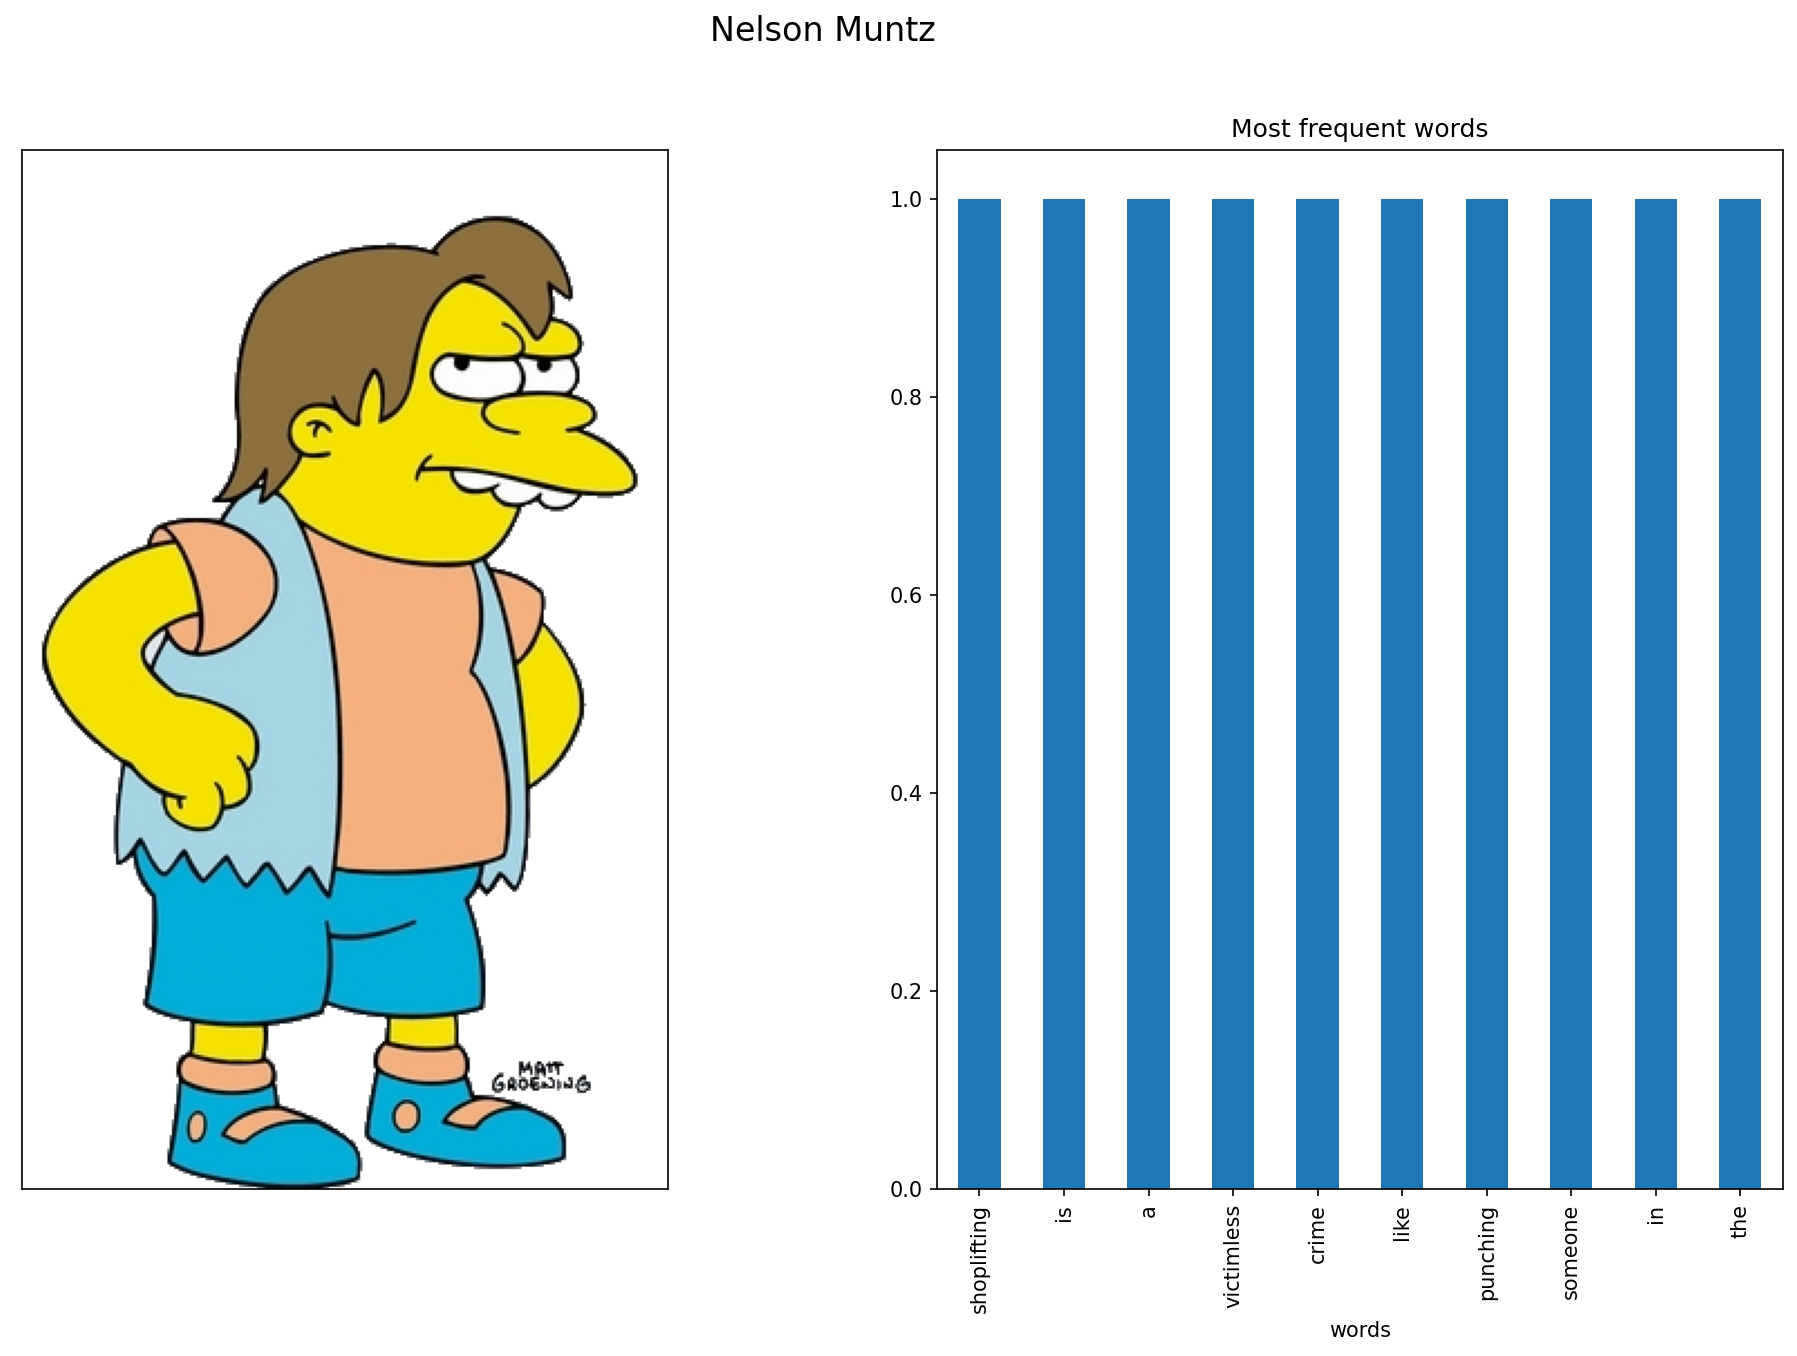

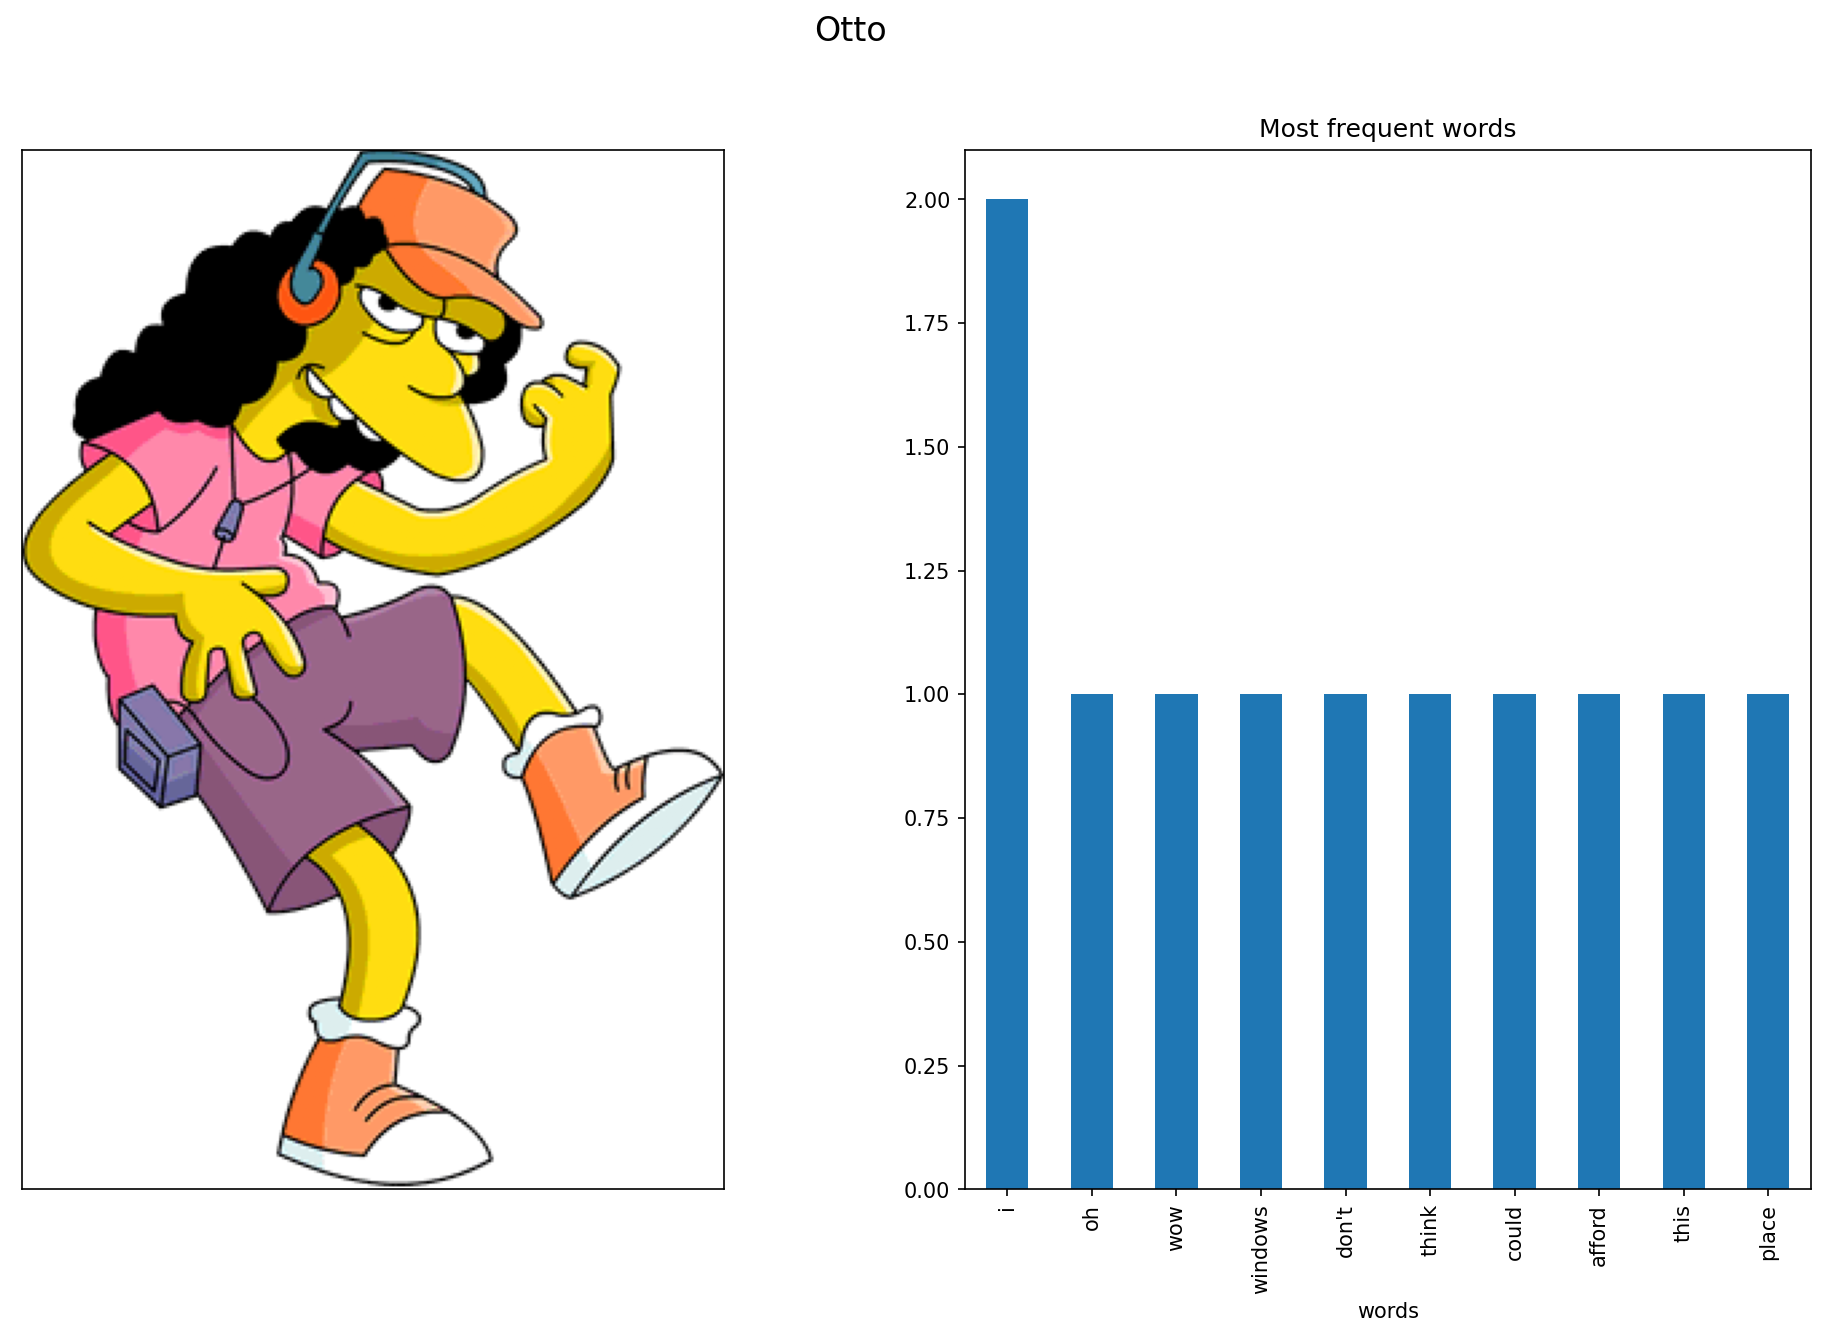

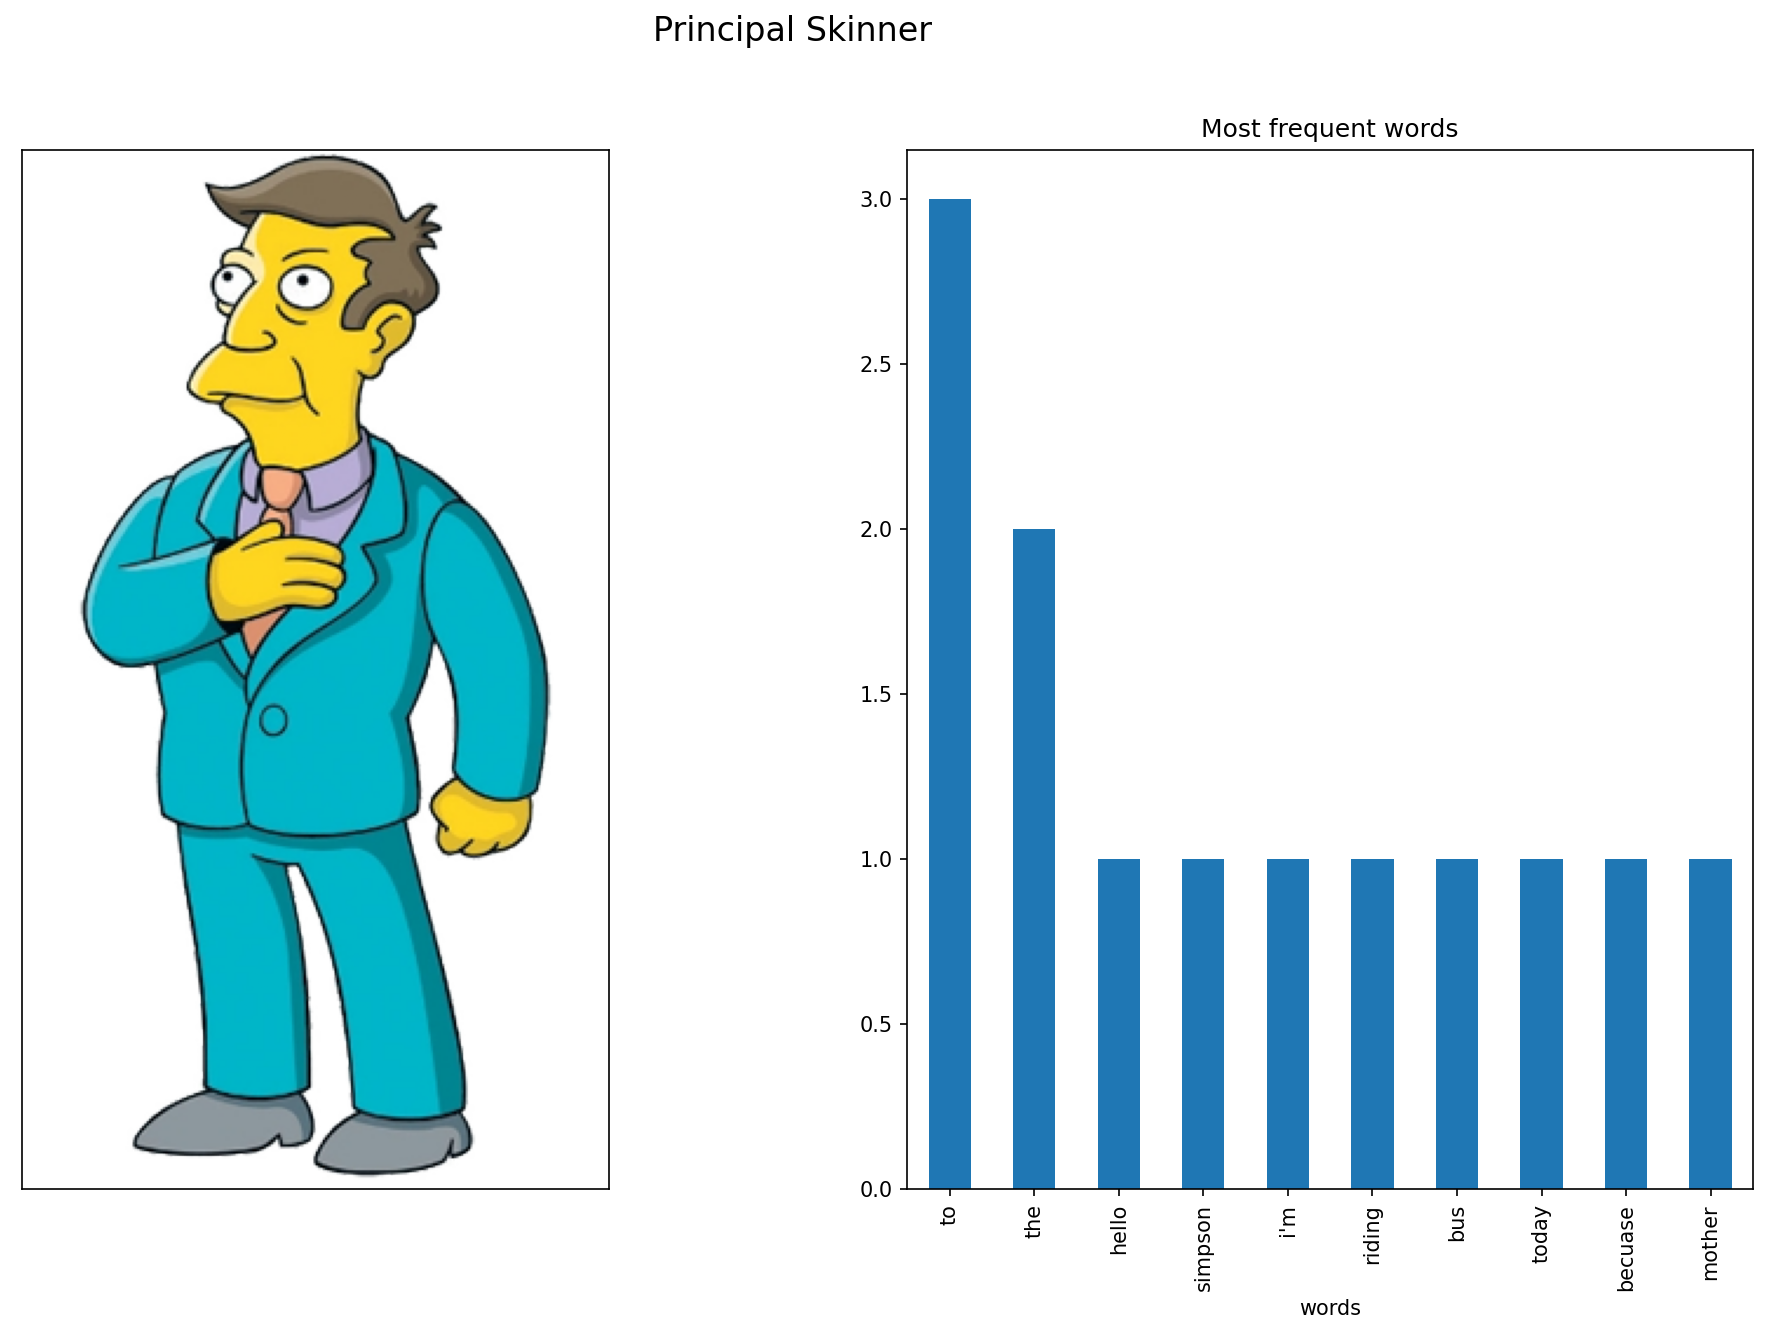

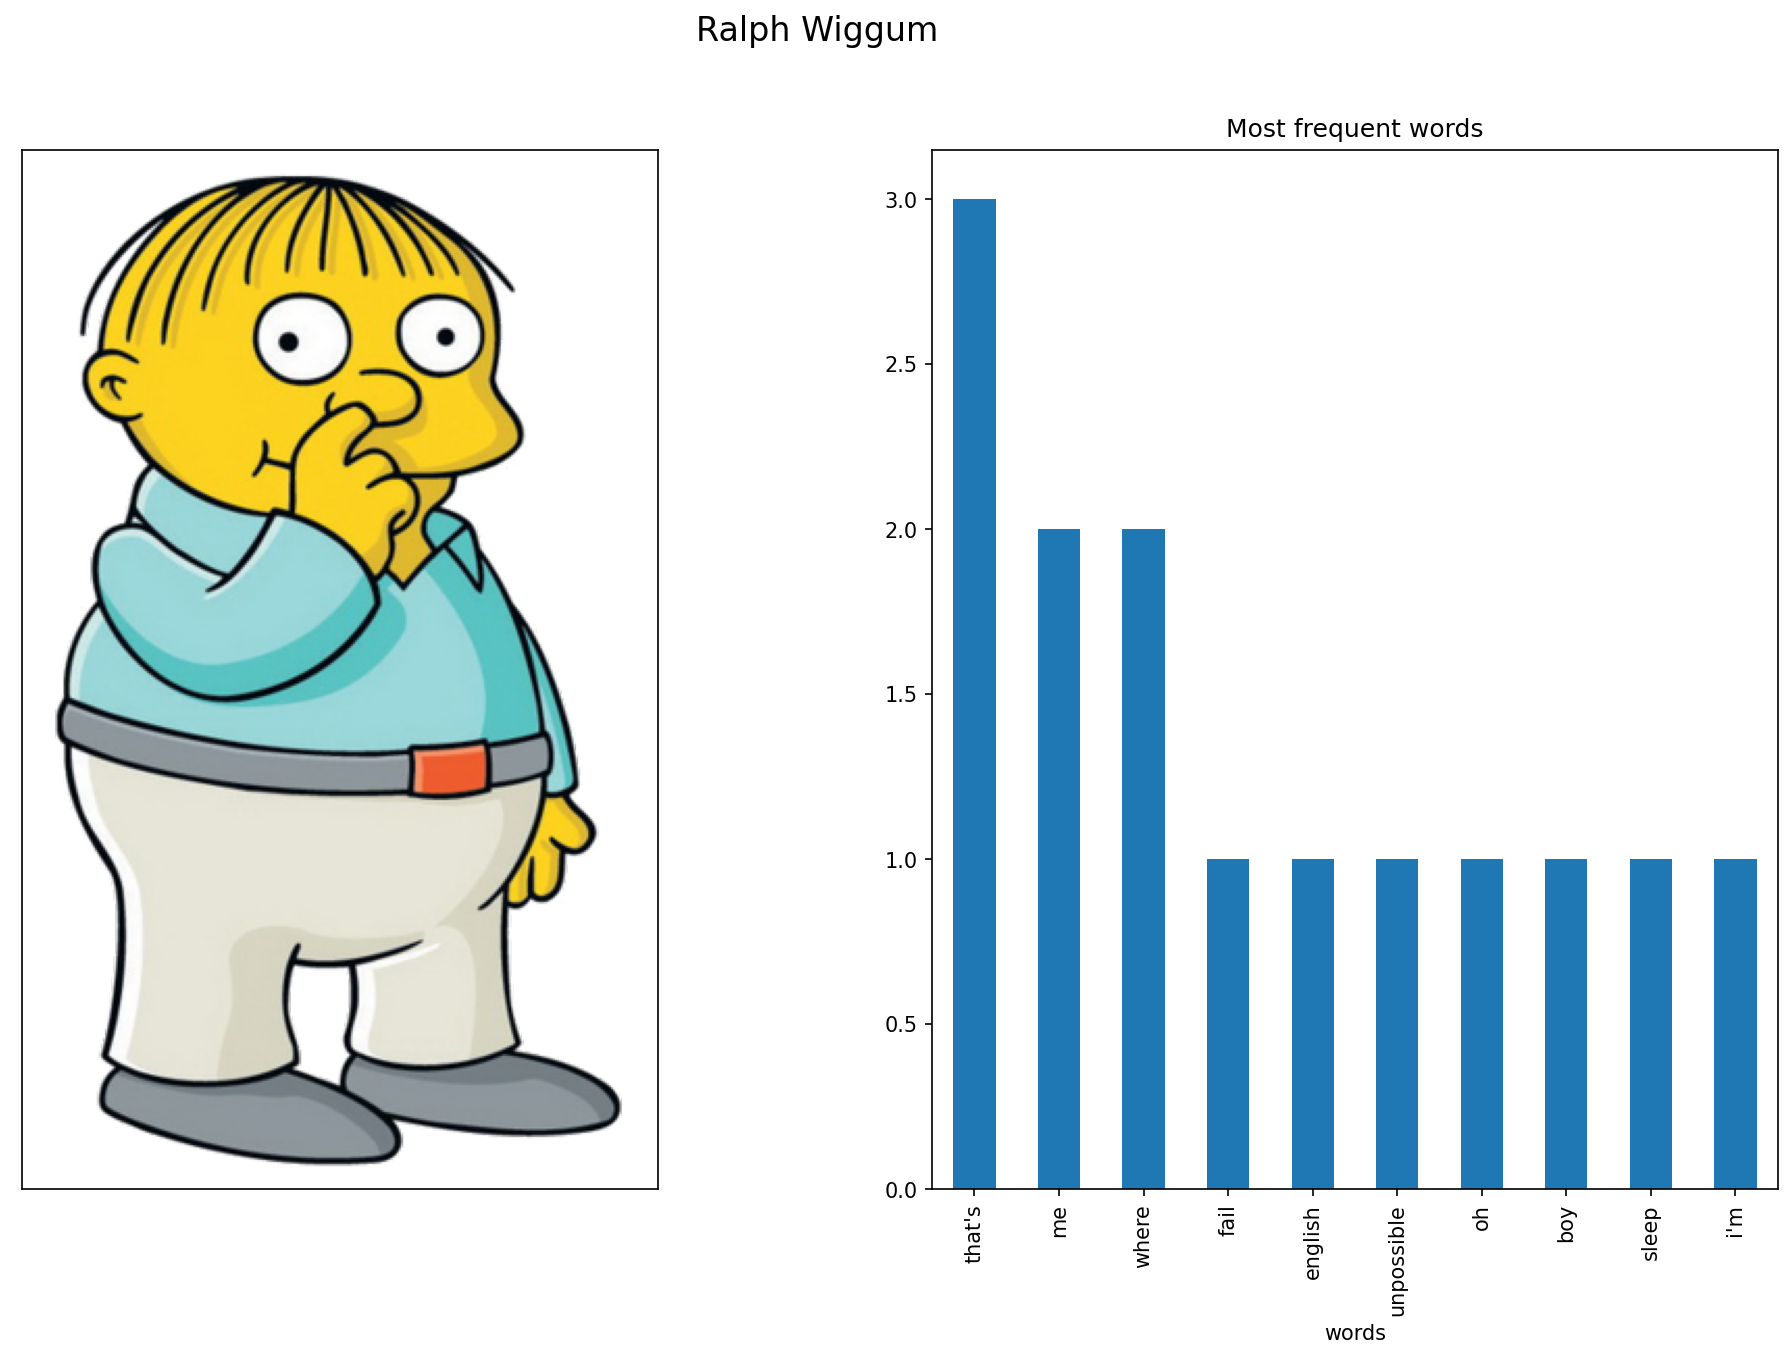

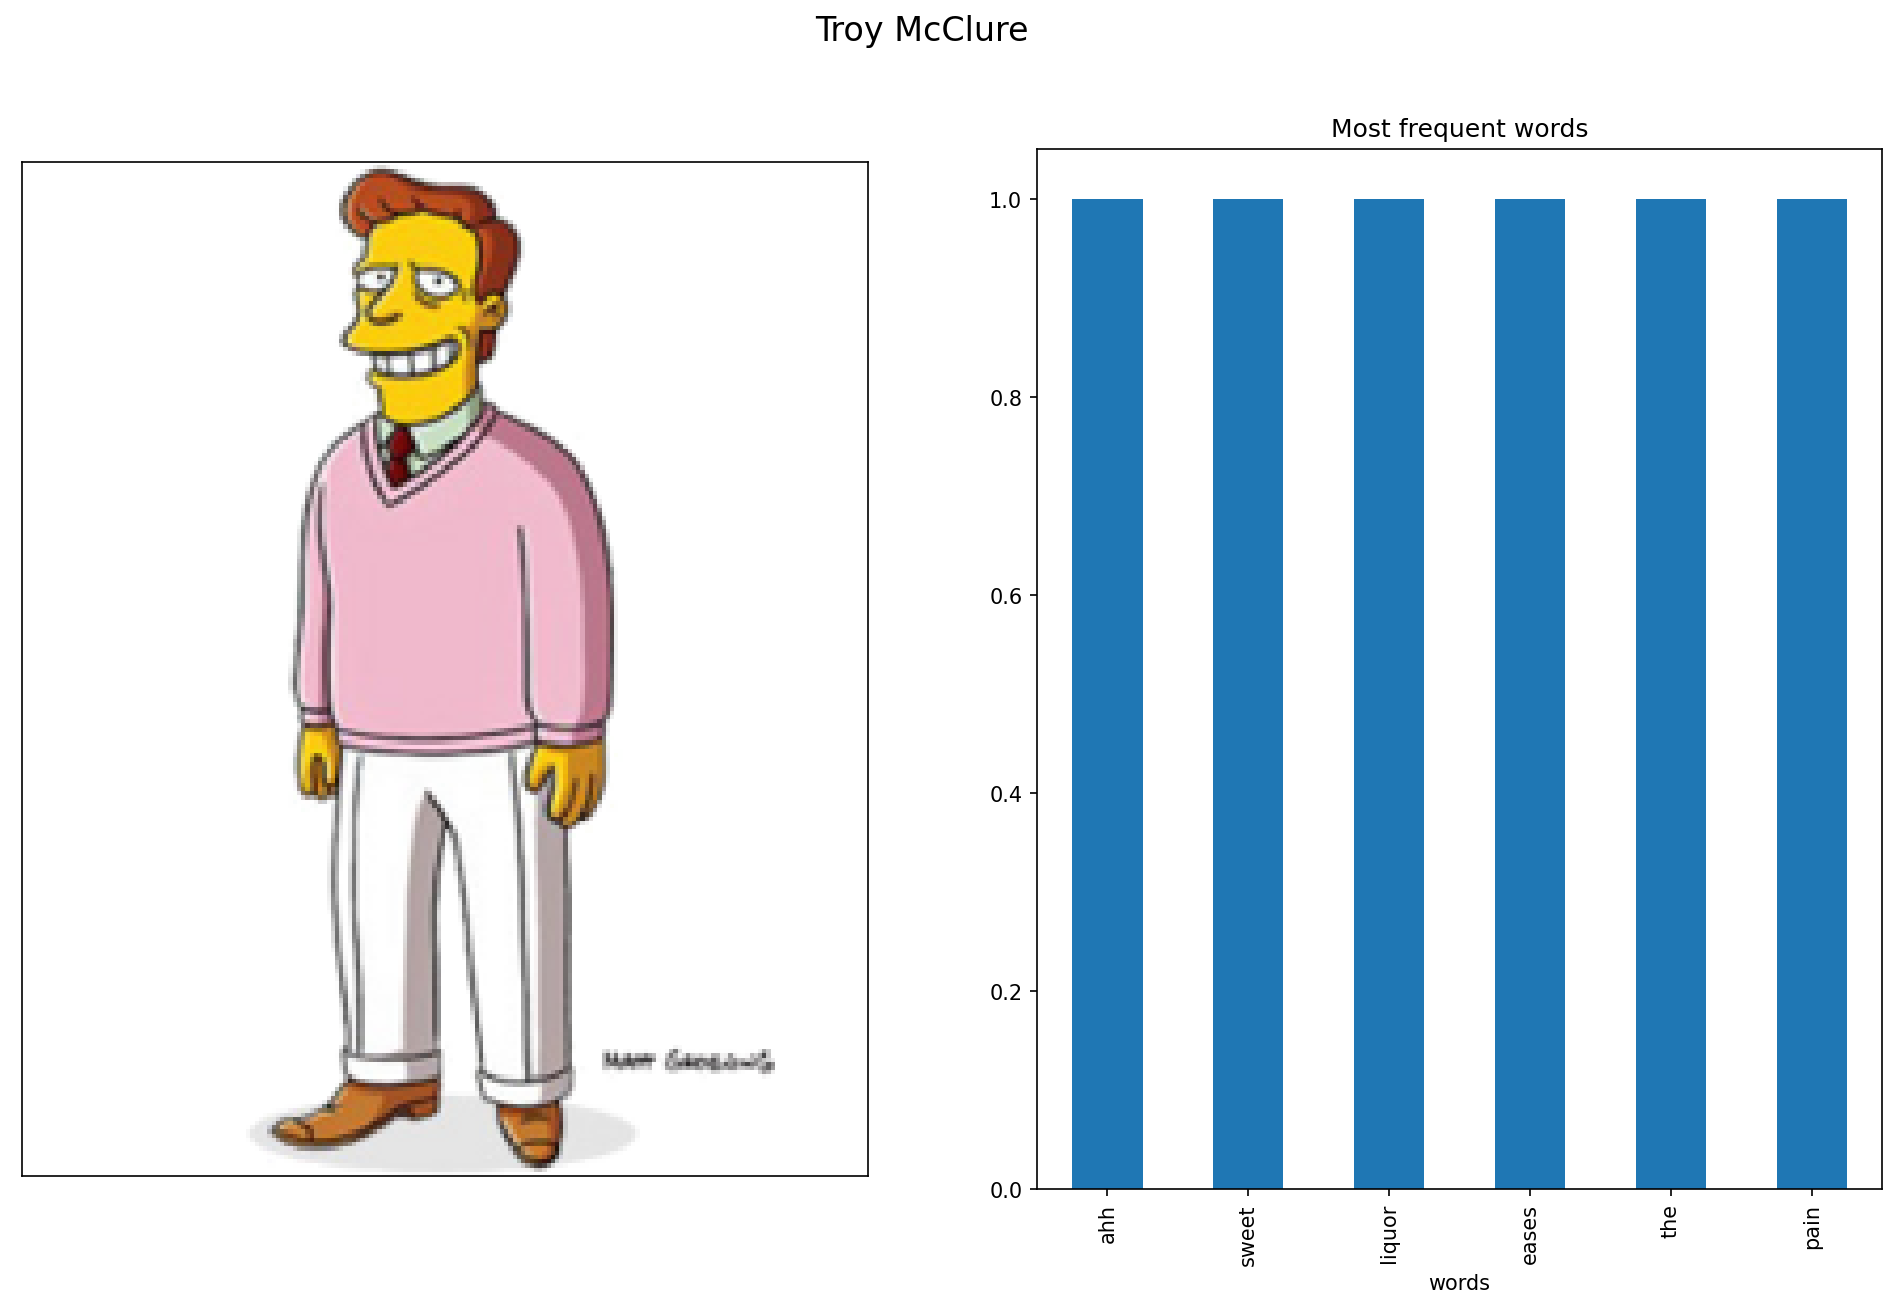

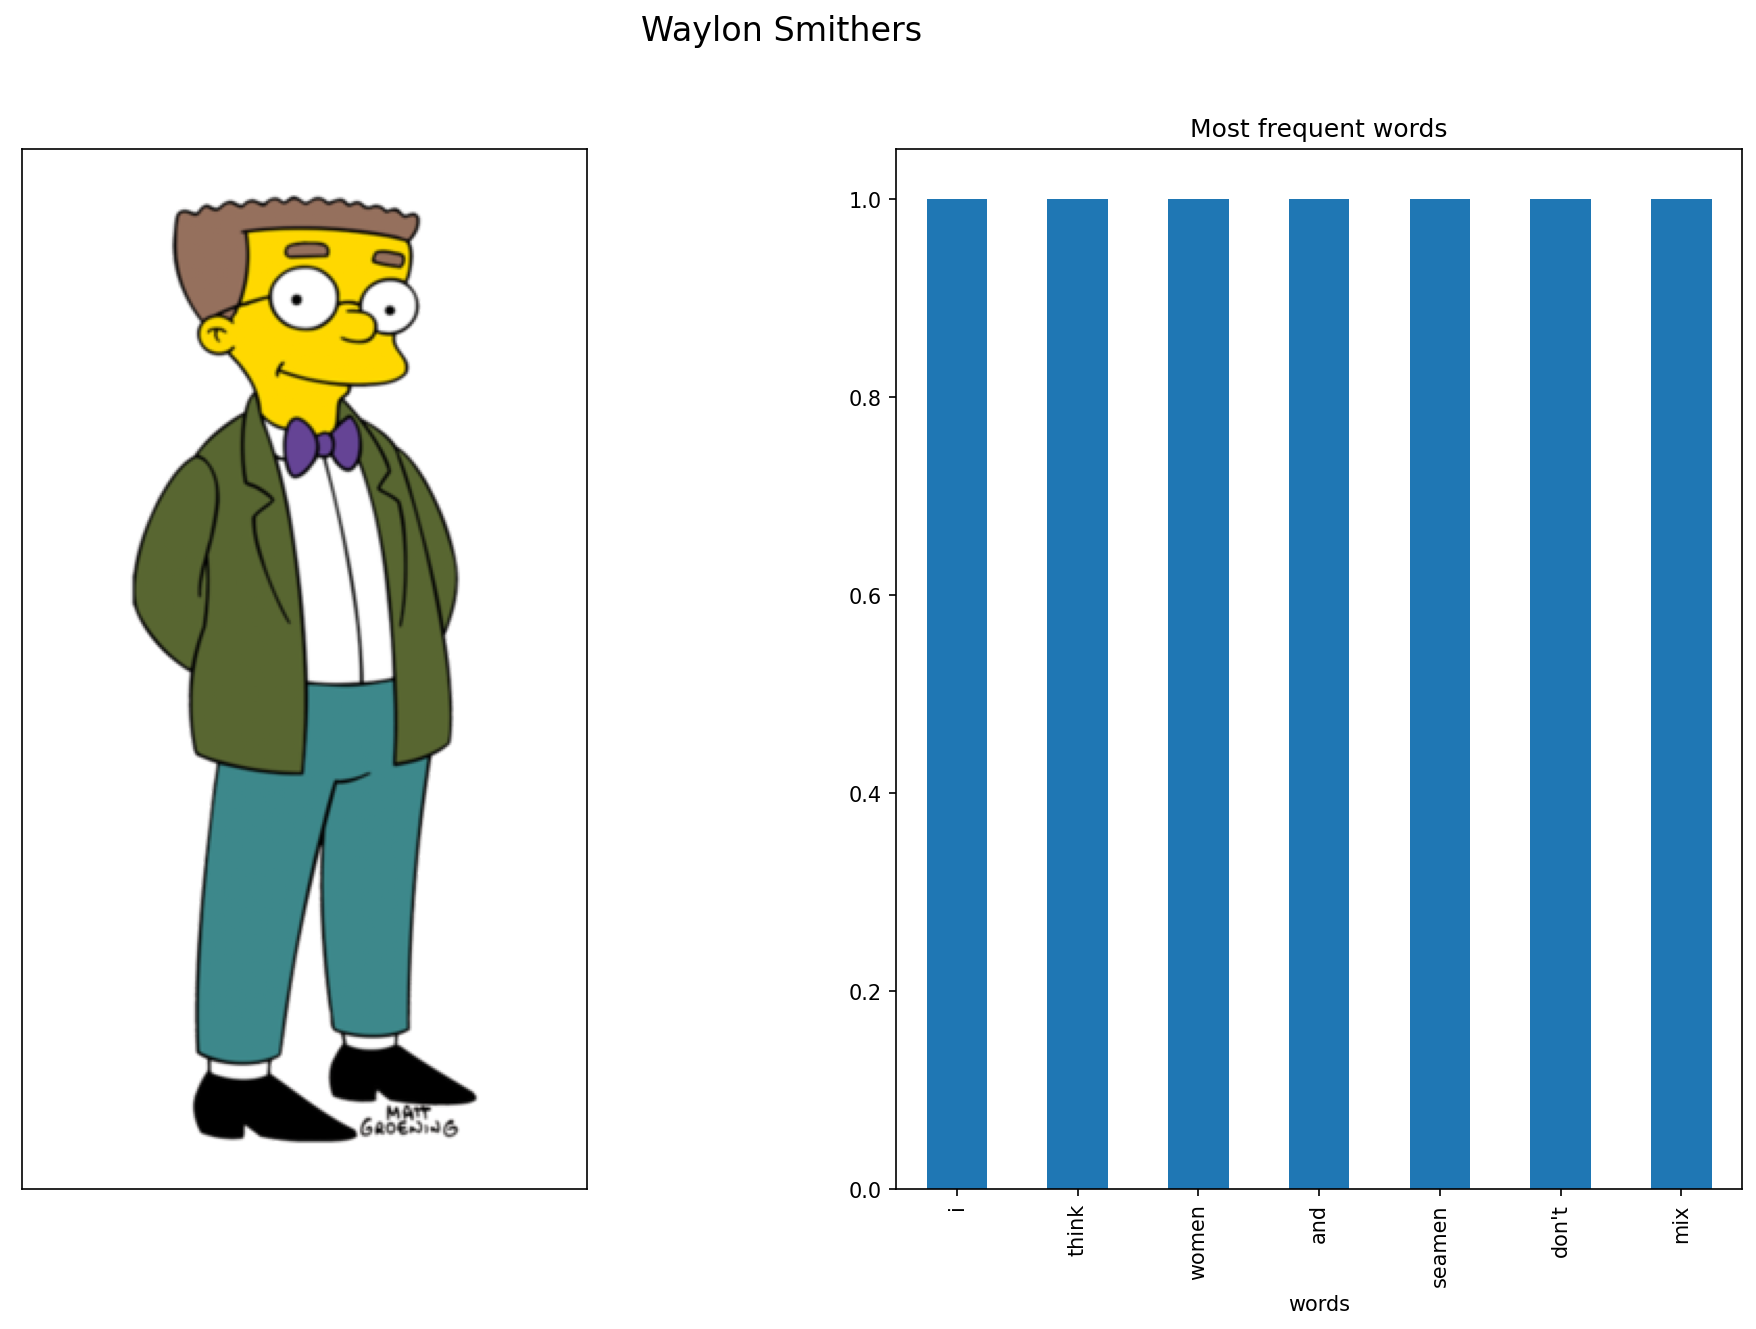

In [6]:
# Show image and most frequent words for each character
for name, data in characters_data.items():
    if not 'image' in data.keys():
        continue
    # print(f'\n\n{name}')
    fig, axes = plt.subplots(figsize=(16,9), dpi=150, nrows=1, ncols=2)
    fig.suptitle(name, fontsize=16)
    plot_image(data['image'], axes[0])
    plot_word_counts(data['counter'], axes[1])
    plt.show()
    print('\n')
    